### The objective is to develop a foundational understanding of risk analytics in banking and financial services, emphasizing how data is leveraged to minimize financial losses when lending to customers. Exploratory data analysis (EDA) is employed to identify patterns and extract insights from the data, aiding in risk mitigation and decision-making.

## Understanding of the Data

In [128]:
# Importing all necessary Libraries and warnings.
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
pd.options.display.max_columns=None # To display all the columns at once 
pd.options.display.max_rows=None #To display all the rows at once 

In [129]:
#importing the Application Dataset
df=pd.read_csv('application_data.csv')


In [130]:
#To find the rows and columns of the dataset
df.shape

(307511, 122)

In [131]:
# To generates a summary of statistical measures to the data
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [132]:
# provides the summary of a DataFrame, including the number of non-null entries, data types of columns, memory usage, and column names, helping to understand the structure of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [133]:
# To Find the Categorical data columns
cat_cols=list(df.dtypes[df.dtypes=='object'].index)
df[cat_cols].head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE FONDKAPREMONT_MODE  HOUSETYPE_MODE  \
0  Business Entity Type 3   reg oper account  block of flats   
1                  School   reg oper account  block of flats   
2              Government                NaN             NaN   
3  Business Entity Type 3                NaN             NaN   
4                Religion                NaN             NaN   

  WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       Stone, brick                  No  
1              Block                  No  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN

In [134]:
#To Find the Numerial data columns
num_cols=list(df.dtypes[df.dtypes!='object'].index)
df[num_cols].head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           -637            -3648.0            -2120          NaN           1   
1          -1188            -1186.0             -291          NaN           1   
2           -225            -4260.0            -2531         26.0           1   
3          -3039            -9833.0            -2437          NaN           1   
4          -3038            -4311.0            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   
3           NaN      0.650442           NaN             NaN               NaN   
4           NaN      0.322738           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COM

## Data Cleaning

In [135]:
# To check how many null values are present in the dataset
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [136]:
# To remove the dataset which is having more than 19% of the missing values
df=df.loc[:,df.isna().mean()<=.19]
len(df.columns)

71

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [138]:
#After removing the missing values we are checking again to get the missing value
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

### Imputing the missing values by removing or adding the required data to it.

In [146]:
# checking the categorical column which has missing value and its 
df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [147]:
#Using the mode of a categorical column is a common method for imputing missing values.
df["NAME_TYPE_SUITE"].mode()[0]  

'Unaccompanied'

In [148]:
#filling the empty value with the most repeated value
df["NAME_TYPE_SUITE"].fillna(value="Unaccompanied",inplace=True)

In [149]:
# Again checking for the same column which had missing value 
df["NAME_TYPE_SUITE"].isna().sum() 

0

In [150]:
# taking the mean because it has lower value 
df["AMT_REQ_CREDIT_BUREAU_HOUR"].mean()

0.005538013274321894

In [151]:
# removing the missing value and filling them with 0.
df.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"]=df.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0)


In [152]:
#taking the mean because it has lower value 
df["AMT_GOODS_PRICE"].mean()

538396.2074288895

In [153]:
#to impute missing values in the AMT_GOODS_PRICE column with its mean and in the AMT_ANNUITY column with its median to handle missing data effectively.
df["AMT_GOODS_PRICE"].fillna(df["AMT_GOODS_PRICE"].mean(),inplace=True)
df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median(),inplace=True)


In [154]:
#to convert the columns DAYS_REGISTRATION and CNT_FAM_MEMBERS to the integer data type (int)
df["DAYS_REGISTRATION"]=df["DAYS_REGISTRATION"].astype(int,errors="ignore")
df["CNT_FAM_MEMBERS"]=df["CNT_FAM_MEMBERS"].astype(int,errors="ignore")
df["DAYS_REGISTRATION"]=df["DAYS_REGISTRATION"].astype(int,errors="ignore")

In [155]:
##to convert the columns which contains the word CNT and BUREAU to the integer data type (int)
selected_cols=df.loc[:,df.columns.str.contains("BUREAU|CNT")]
df[selected_cols.columns]=selected_cols.apply(pd.to_numeric,errors="coerce").fillna(0).astype(int)

In [156]:
df["EXT_SOURCE_2"].fillna(df["EXT_SOURCE_2"].mean(),inplace=True) # filling the values for EXT_SOURCE_2 col

In [157]:
# checking if there is any missing values
df.isna().sum() 

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [158]:
# removing the FLAG col because it doesn't contains any necessary values
df.drop(columns=df.columns[df.columns.str.startswith("FLAG")],inplace=True) 

In [159]:
# checking for missing values
df.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATI

### coverting the negative values to positive for better visualization

In [160]:
df.head(10)

df['DAYS_BIRTH']=df['DAYS_BIRTH'].abs()

df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].abs()

df['DAYS_REGISTRATION']=df['DAYS_REGISTRATION'].abs()

df['DAYS_ID_PUBLISH']=df['DAYS_ID_PUBLISH'].abs()

df['DAYS_LAST_PHONE_CHANGE']=df['DAYS_LAST_PHONE_CHANGE'].abs()

df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   
6      100009       0         Cash loans           F             1   
7      100010       0         Cash loans           M             0   
8      100011       0         Cash loans           F             0   
9      100012       0    Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   
5           99000.0    490495.5      27517.5         454500.0   
6          171000.0   1560726.0      41301.0        1395000.0   
7          360000.0   1530000.0      42075.0        1530000.0   
8          112500.0   1019610.0      33826.5         913500.0   
9          135000.0    405000.0      20250.0         405000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
1           Family         State servant               Higher education   
2    Unaccompanied               Working  Secondary / secondary special   
3    Unaccompanied               Working  Secondary / secondary special   
4    Unaccompanied               Working  Secondary / secondary special   
5  Spouse, partner         State servant  Secondary / secondary special   
6    Unaccompanied  Commercial associate               Higher education   
7    Unaccompanied         State servant               Higher education   
8         Children             Pensioner  Secondary / secondary special   
9    Unaccompanied               Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   
6               Married  House / apartment                    0.035792   
7               Married  House / apartment                    0.003122   
8               Married  House / apartment                    0.018634   
9  Single / not married  House / apartment                    0.019689   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       19046            225               4260             2531   
3       19005           3039               9833             2437   
4       19932           3038               4311             3458   
5       16941           1588               4970              477   
6       13778           3130               1213              619   
7       18850            449               4597             2379   
8       20099         365243               7427             3514   
9       14469           2019              14437             3992   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2             

In [161]:
#checking for missing values in categrical data i.e(XNA or XAP) masked data
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print("----"*20)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------------------------------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
--------------------------------------------------------------------------------
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
--------------------------------------------------------------------------------
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
--------------------------------------------------------------------------------
Secondar

In [162]:
#dropping the ORGANIZATION_TYPE col because it has XNA values
df=df.drop(df.loc[df["ORGANIZATION_TYPE"]=="XNA"].index) 

In [163]:
#It calculates the frequency of each unique value in the ORGANIZATION_TYPE column of the DataFrame df
df["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [164]:
# replacing the value from XNA to F 
df["CODE_GENDER"].replace(to_replace="XNA",value="F",inplace=True)

In [165]:
#It calculates the frequency of each unique value in the CODE_GENDER
df["CODE_GENDER"].value_counts()

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

In [166]:
# checking the shape
df.shape

(252137, 43)

In [167]:
 # checking for nunique values AMT_INCOME_TOTAL col
df["AMT_INCOME_TOTAL"].nunique()

2266

In [168]:
# We can create bins as there are wide range of values which can be put into bins for better understanding of the data
bins_income = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot_income = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df["AMT_INCOME_RANGE"]=pd.cut(df["AMT_INCOME_TOTAL"],bins=bins_income,labels=slot_income)
df["AMT_INCOME_RANGE"].head()

0    200000-225000
1    250000-275000
2      50000-75000
3    125000-150000
4    100000-125000
Name: AMT_INCOME_RANGE, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [169]:
# We can create bins as there are wide range of values which can be put into bins for better understanding of the data
bins_credit = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]

slots_credit = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df["AMT_CREDIT_RANGE"]=pd.cut(df["AMT_CREDIT"],bins=bins_credit,labels=slots_credit)
df["AMT_CREDIT_RANGE"].head()

0       400000-450000
1    900000 and above
2            0-150000
3       300000-350000
4       500000-550000
Name: AMT_CREDIT_RANGE, dtype: category
Categories (17, object): ['0-150000' < '150000-200000' < '200000-250000' < '250000-300000' ... '750000-800000' < '800000-850000' < '850000-900000' < '900000 and above']

In [170]:
#To check the rows and col after manipulating the missing values
df.shape

(252137, 45)

In [171]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801        9461            637   
1  House / apartment                    0.003541       16765           1188   
2  House / apartment                    0.010032       19046            225   
3  House / apartment                    0.008019       19005           3039   
4  House / apartment                    0.028663       19932           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0               3648             2120                1                     2   
1               1186              291                2                     1   
2               4260             2531                1                     2   
3               9833             2437                2                     2   
4               4311             3458                1                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                      

<Axes: >

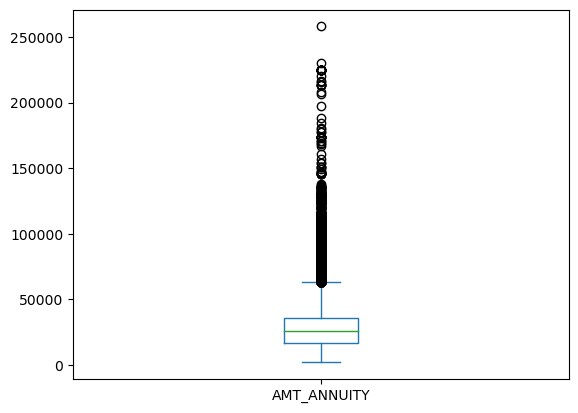

In [172]:
#checking for the outlier in the AMT_ANNUITY col.
df["AMT_ANNUITY"].plot.box()


<Axes: >

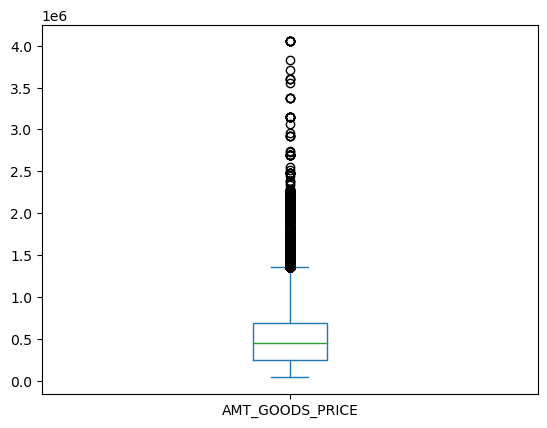

In [173]:
 #checking for the outlier AMT_GOODS_PRICE in the  col.
df['AMT_GOODS_PRICE'].plot.box()

### Univariate Analysis

In [174]:
df["TARGET"].value_counts() #target value represent whether the person has paid the loan or not

0    230302
1     21835
Name: TARGET, dtype: int64

#### Target 0 : People who paid the loan
#### Target 1 : People who have not paid the loan

<Axes: >

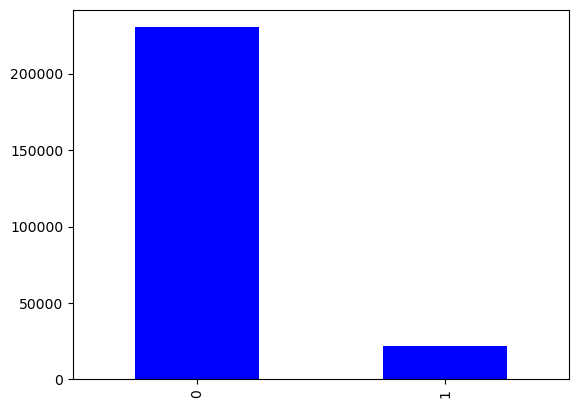

In [175]:
# plotting the bar graph for the target 0 and traget 1 values
df.TARGET.value_counts().plot.bar(color="Blue")

#### Bar graph depicts that paid ones are higher in number compared to not paid ones

In [176]:
# count of target 0
# count of target 1

target_0=df.loc[df["TARGET"]==0]
target_1=df.loc[df["TARGET"]==1]

len(target_0),len(target_1)

(230302, 21835)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'State servant'),
  Text(1, 0, 'Working'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Student'),
  Text(4, 0, 'Pensioner'),
  Text(5, 0, 'Businessman'),
  Text(6, 0, 'Maternity leave')])

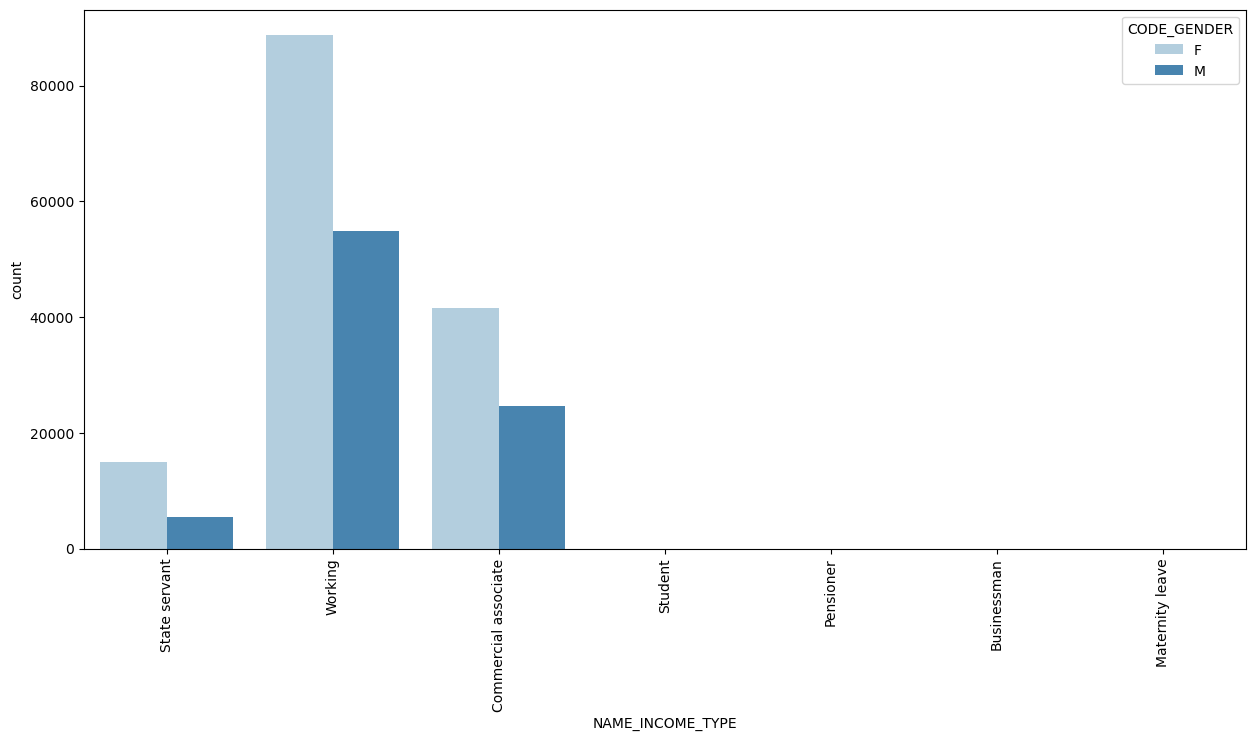

In [177]:
#lots NAME_INCOME_TYPE by CODE_GENDER for target_0 with a blue palette and rotated labels.
plt.figure(figsize=(15,7))
sns.countplot(target_0,x="NAME_INCOME_TYPE",hue="CODE_GENDER",palette="Blues")
plt.xticks(rotation=90)

#### The "Working" income type accounts for the largest percentage of both males and females, with slightly more women than men.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0-25000'),
  Text(1, 0, '25000-50000'),
  Text(2, 0, '50000-75000'),
  Text(3, 0, '75000,100000'),
  Text(4, 0, '100000-125000'),
  Text(5, 0, '125000-150000'),
  Text(6, 0, '150000-175000'),
  Text(7, 0, '175000-200000'),
  Text(8, 0, '200000-225000'),
  Text(9, 0, '225000-250000'),
  Text(10, 0, '250000-275000'),
  Text(11, 0, '275000-300000'),
  Text(12, 0, '300000-325000'),
  Text(13, 0, '325000-350000'),
  Text(14, 0, '350000-375000'),
  Text(15, 0, '375000-400000'),
  Text(16, 0, '400000-425000'),
  Text(17, 0, '425000-450000'),
  Text(18, 0, '450000-475000'),
  Text(19, 0, '475000-500000'),
  Text(20, 0, '500000 and above')])

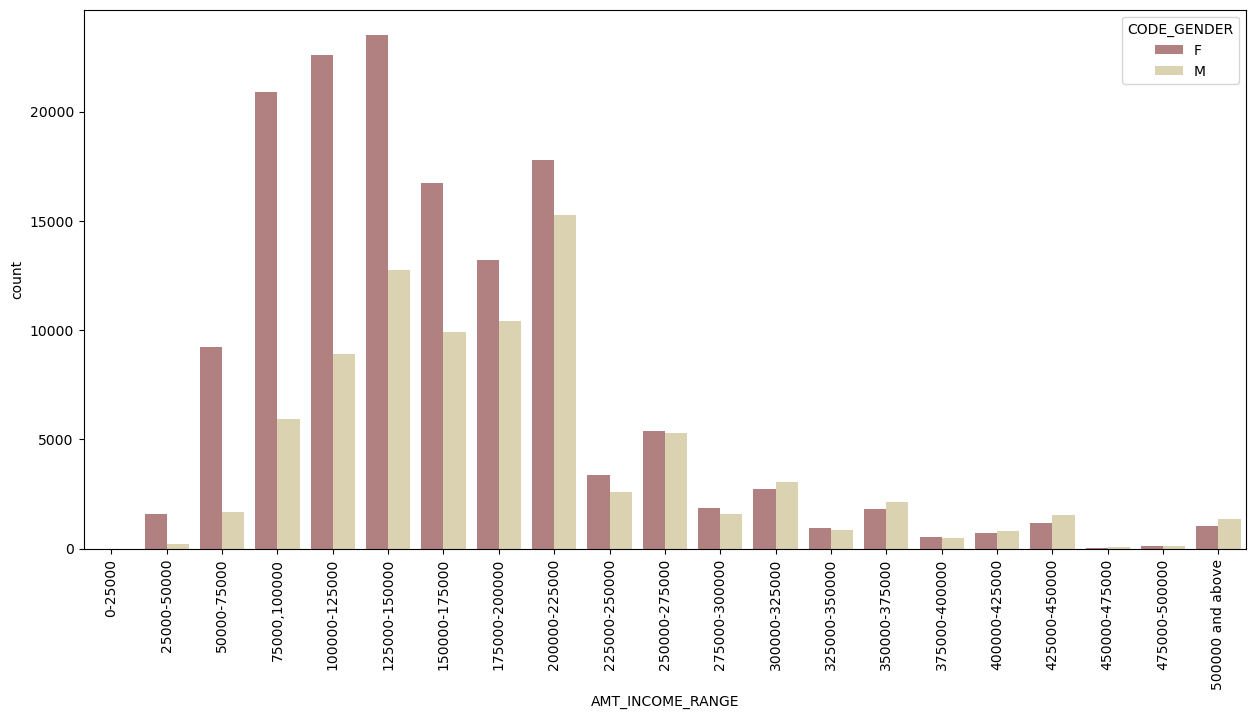

In [178]:
# Creates a count plot of AMT_INCOME_RANGE by CODE_GENDER for target_0 with a pink palette and rotated labels.
plt.figure(figsize=(15,7))
sns.countplot(target_0,x="AMT_INCOME_RANGE",hue="CODE_GENDER",palette="pink")
plt.xticks(rotation=90)

#### The bulk of applicants are middle-class (150,000–225,000), while women make up the largest percentage.There is a change in high-income categories, where men predominate.

<Axes: xlabel='count', ylabel='NAME_CONTRACT_TYPE'>

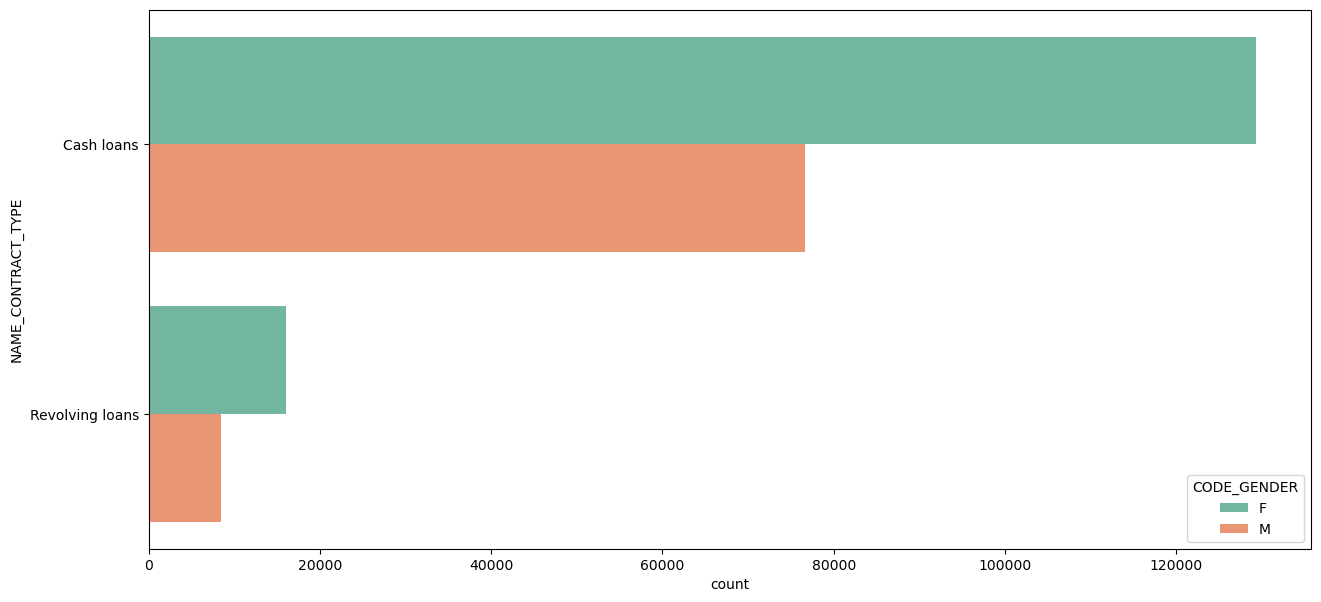

In [179]:
#Creates a vertical count plot of ORGANIZATION_TYPE for target_0, ordered by frequency, with a cool color palette.
plt.figure(figsize=[15, 7])

sns.countplot(data=target_0, y='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='Set2')

#### According to the data, women in this dataset appear to be more financially active

<Axes: xlabel='count', ylabel='ORGANIZATION_TYPE'>

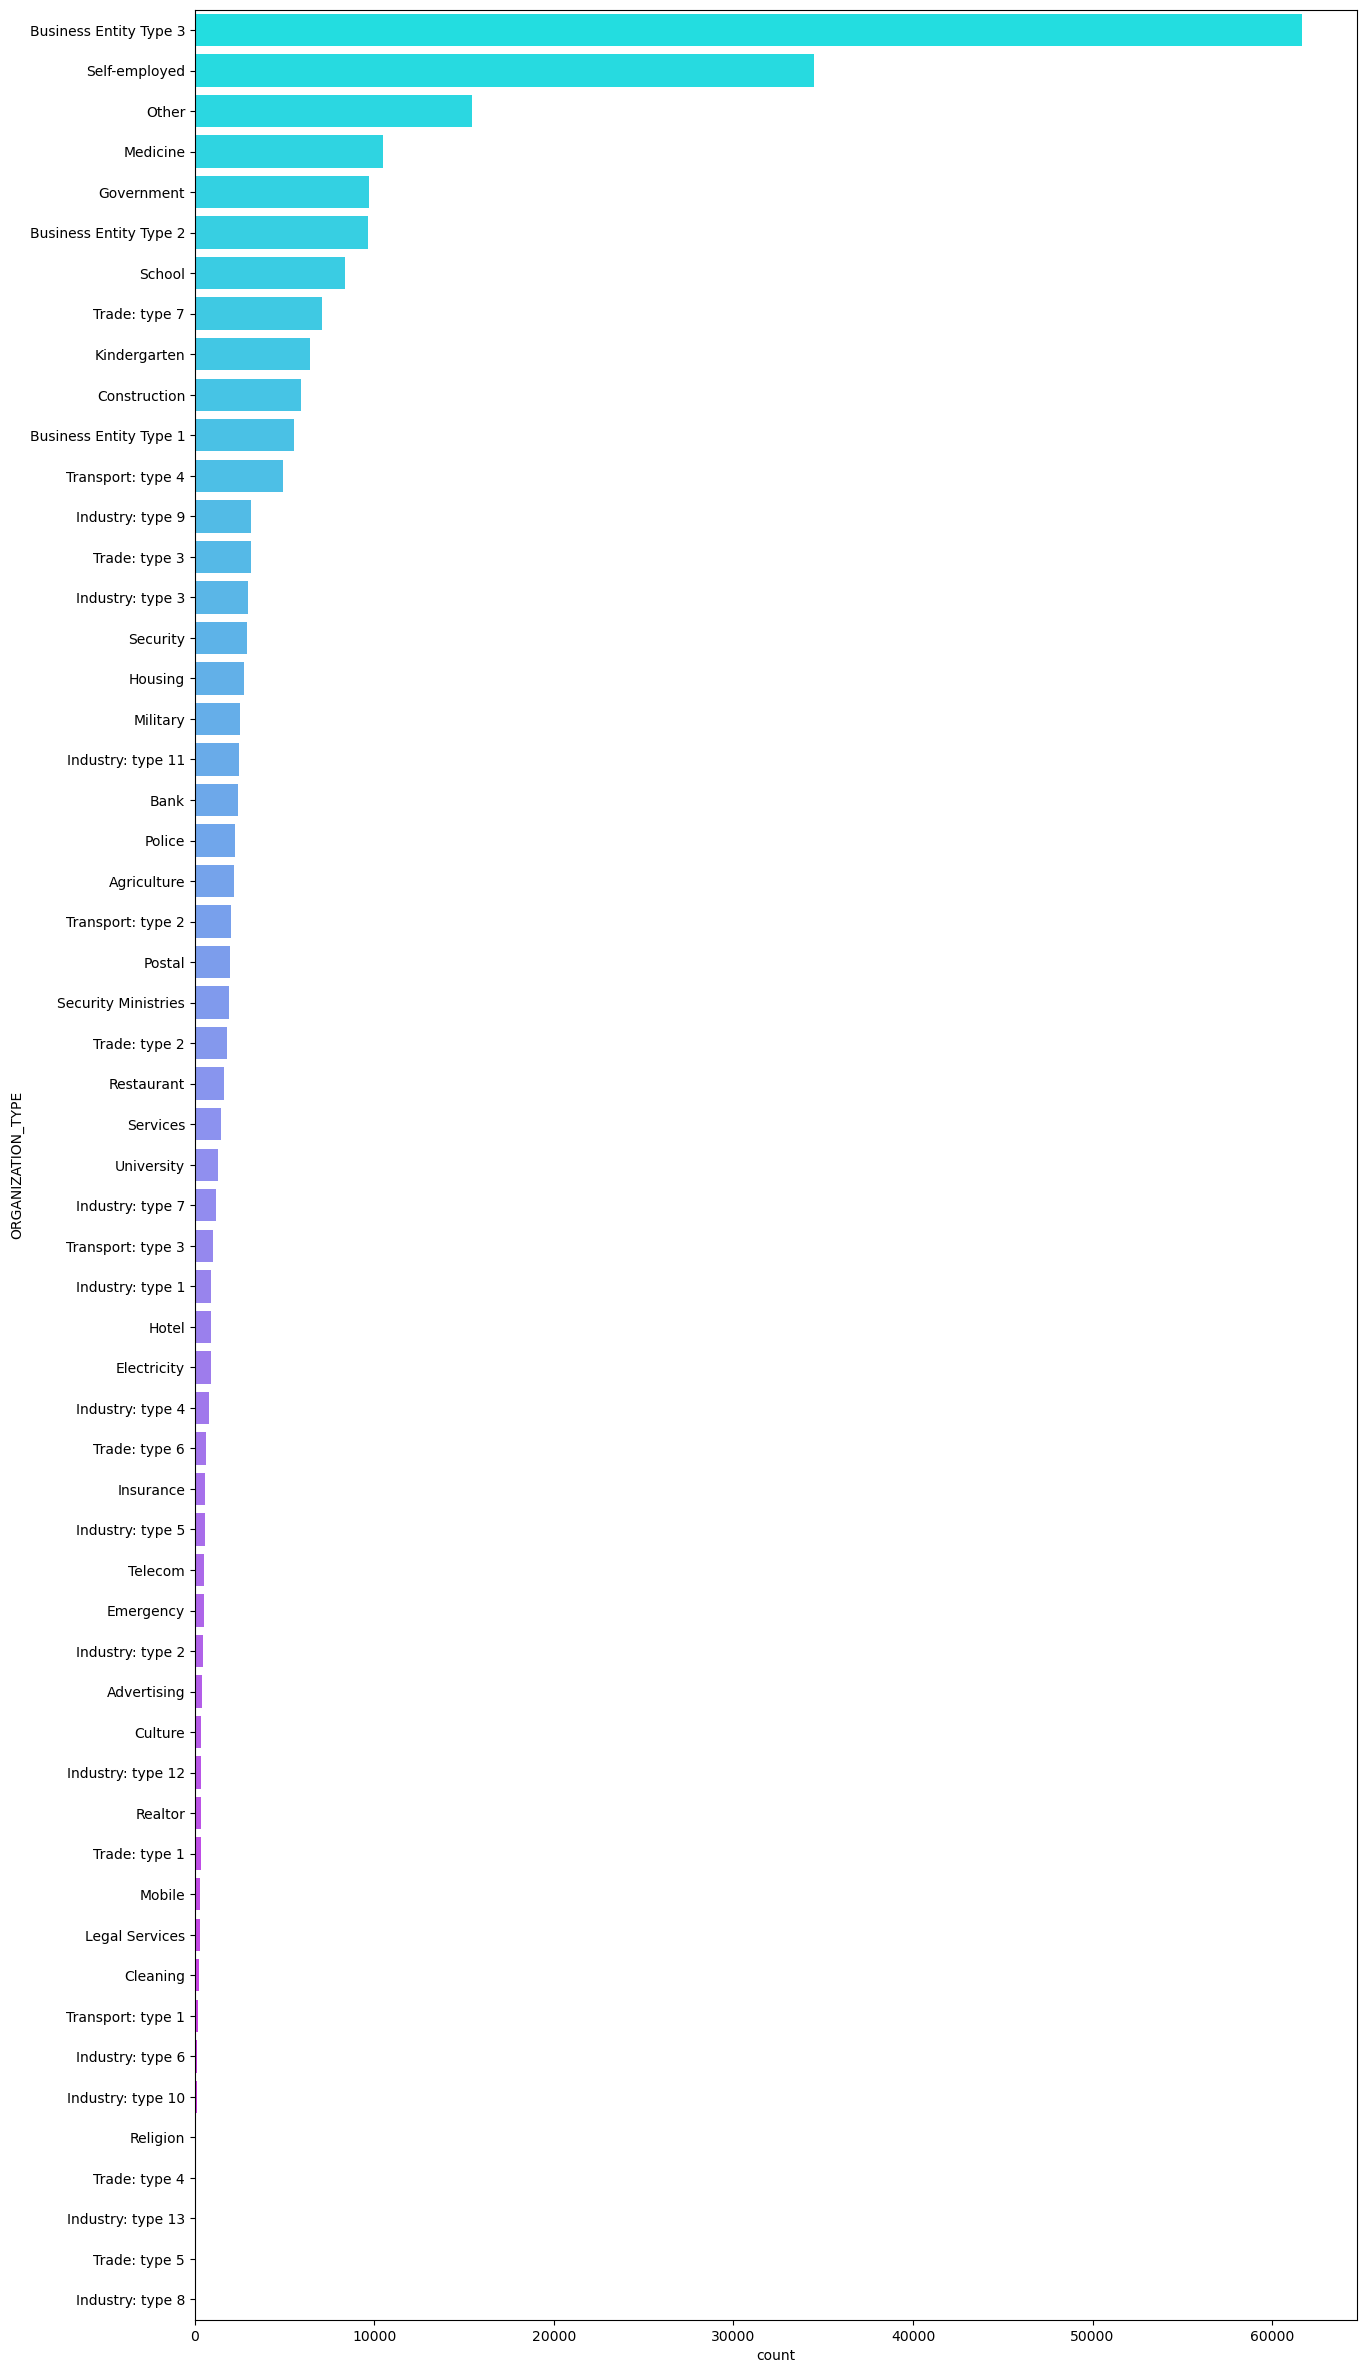

In [180]:
#This code creates a horizontal bar plot showing the count of each category in the ORGANIZATION_TYPE column of target_0.
plt.figure(figsize=[15, 30])

sns.countplot(data=target_0, y='ORGANIZATION_TYPE', order=target_0['ORGANIZATION_TYPE'].value_counts().index, palette='cool')


#### paid ones more in Business entity sector.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '0-25000'),
  Text(1, 0, '25000-50000'),
  Text(2, 0, '50000-75000'),
  Text(3, 0, '75000,100000'),
  Text(4, 0, '100000-125000'),
  Text(5, 0, '125000-150000'),
  Text(6, 0, '150000-175000'),
  Text(7, 0, '175000-200000'),
  Text(8, 0, '200000-225000'),
  Text(9, 0, '225000-250000'),
  Text(10, 0, '250000-275000'),
  Text(11, 0, '275000-300000'),
  Text(12, 0, '300000-325000'),
  Text(13, 0, '325000-350000'),
  Text(14, 0, '350000-375000'),
  Text(15, 0, '375000-400000'),
  Text(16, 0, '400000-425000'),
  Text(17, 0, '425000-450000'),
  Text(18, 0, '450000-475000'),
  Text(19, 0, '475000-500000'),
  Text(20, 0, '500000 and above')])

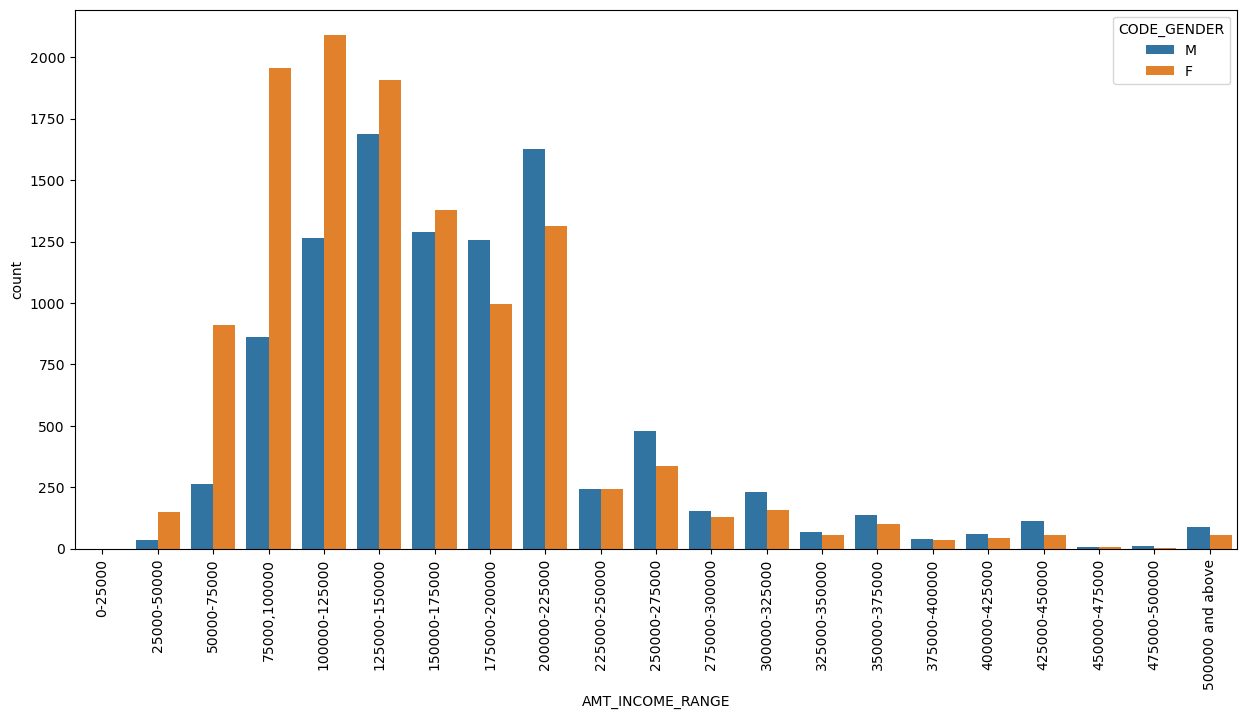

In [48]:
#Plots AMT_INCOME_RANGE by CODE_GENDER for target_1 with rotated x-axis labels.
plt.figure(figsize=(15,7))
sns.countplot(target_1,x="AMT_INCOME_RANGE",hue="CODE_GENDER")
plt.xticks(rotation=90)

#### Females are more in (100000-125000) this range

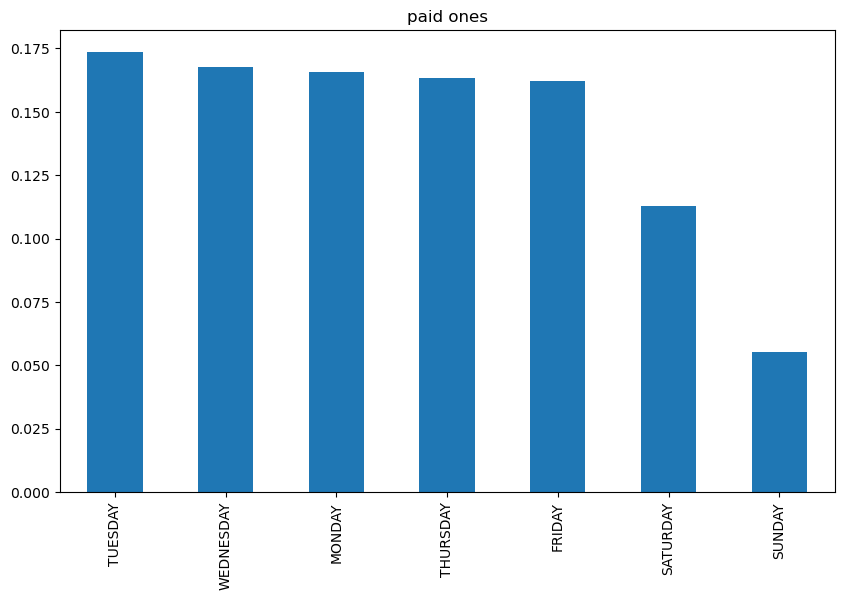

In [49]:
plt.figure(figsize=(10,6))
target_0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('paid ones')
plt.show()

#### In the bargraph we can analyse that Tuesday has highest number of paid ones

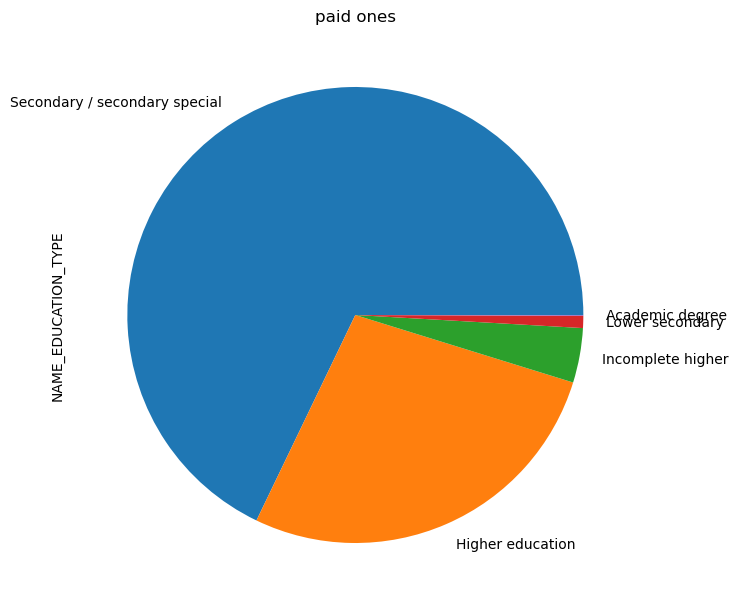

In [50]:
#To visualize the proportion of loan application processes started on each weekday for the "paid ones"
plt.figure(figsize=(8,6))
target_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('paid ones')
plt.show()

#### The pie chart describes the highest paid ones education belong to secondary/special type. 

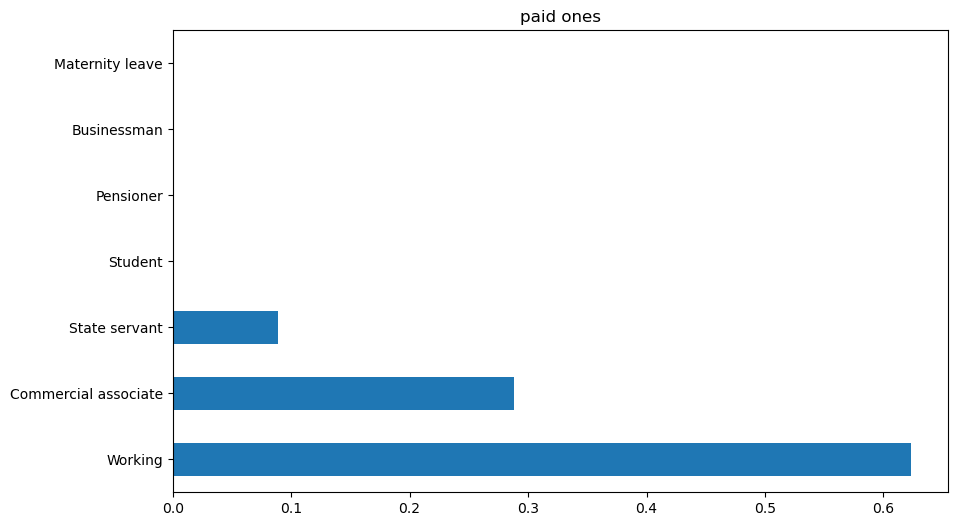

In [51]:
#This code plots a horizontal bar chart showing the proportions of each category in NAME_INCOME_TYPE from target_0, titled "paid ones."
plt.figure(figsize=(10,6))
target_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('paid ones')
plt.show()

#### The horizontal bar shows working sector has the highest paid ones.

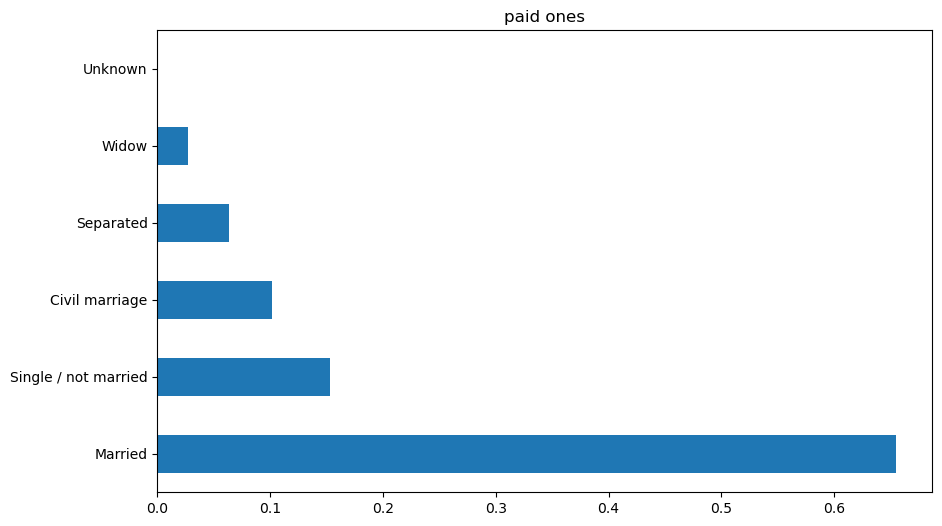

In [52]:
#This code creates a horizontal bar chart showing the proportions of each category in NAME_FAMILY_STATUS from target_0, titled "paid ones."
plt.figure(figsize=(10,6))
target_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('paid ones')
plt.show()

#### In the horizontal bargraph we can see that married people has paid the highest loans

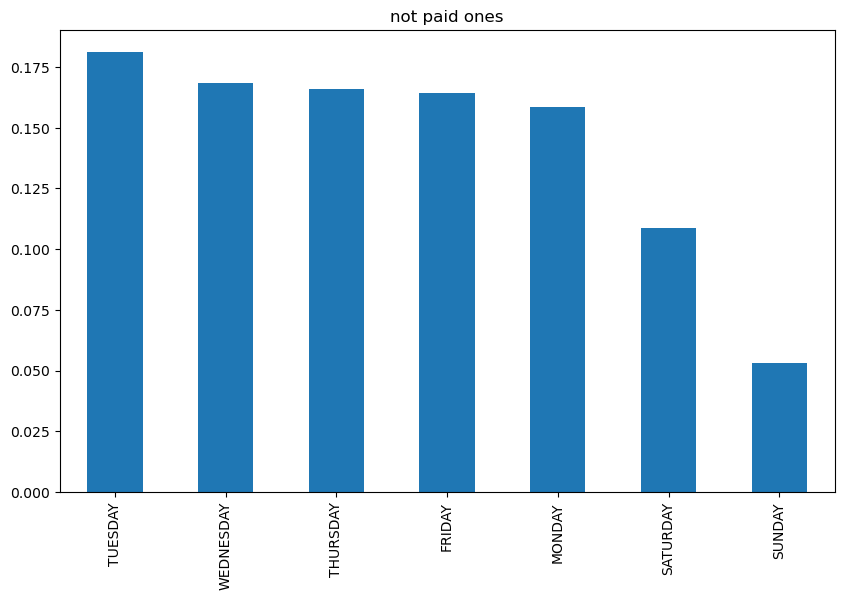

In [53]:
# Univariate analysis of the WEEKDAY_APPR_PROCESS_START categorical variable for defaulters (TARGET = 1), showing the normalized (relative) frequency distribution of the days when the application process started.
plt.figure(figsize=(10,6))
target_1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('not paid ones')
plt.show()


#### # from the graph we can conclude that application starting processes are generally less in saturday and sunday.

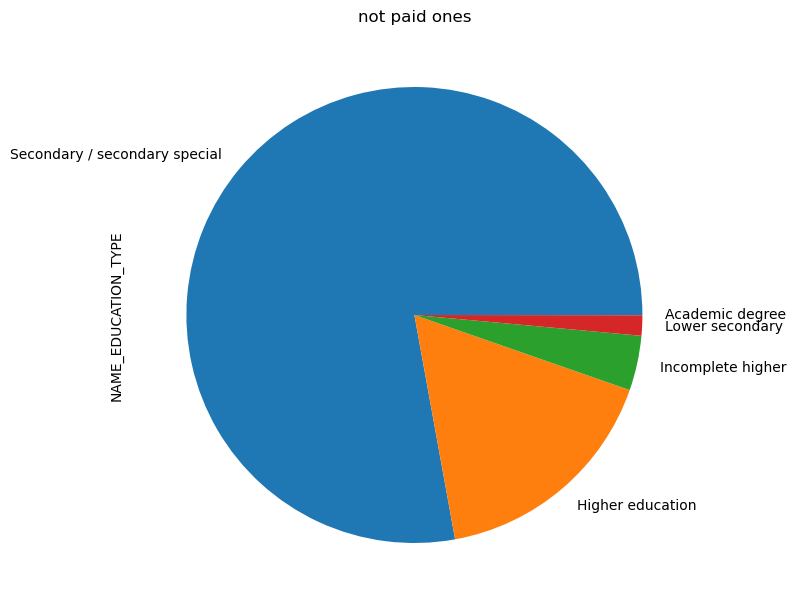

In [54]:
#The pie chart indicates that most defaulters have either a 'Higher education' or 'Secondary' level of education.
plt.figure(figsize=(10,6))
target_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.tight_layout()
plt.title('not paid ones')
plt.show()

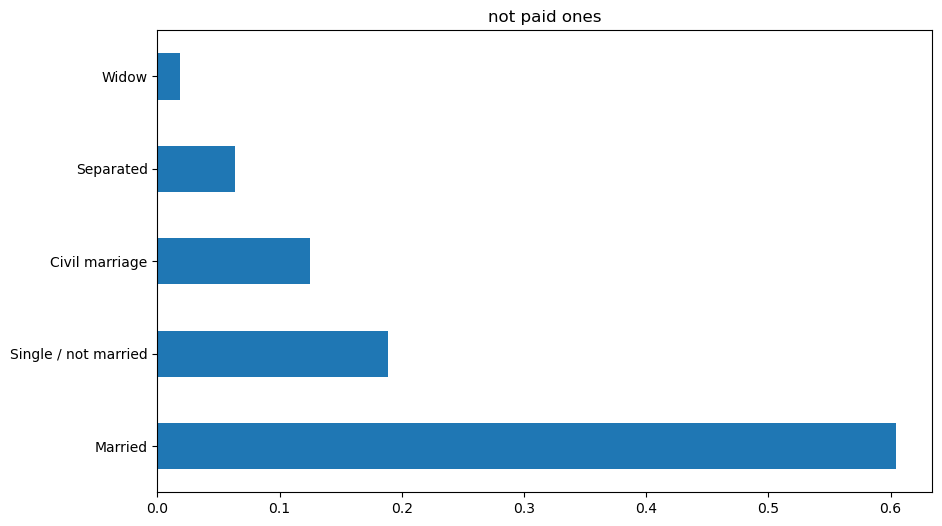

In [55]:
#This code creates a horizontal bar chart displaying the proportions of each category in NAME_FAMILY_STATUS from target_1, titled "not paid ones."
plt.figure(figsize=(10,6))
target_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title('not paid ones')
plt.show()

#### This is evident from the horizontal bar graph showing We may say that married people tend to take out more loans than people in other groups.

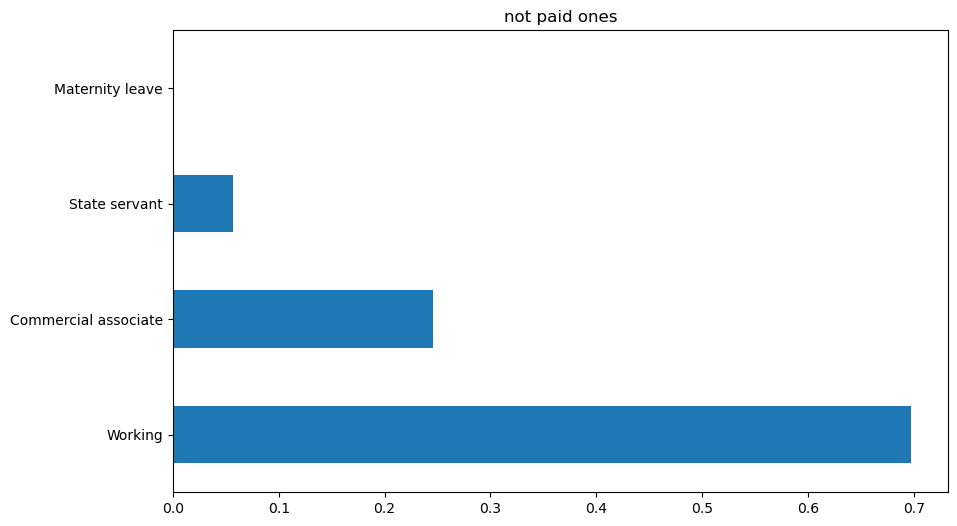

In [56]:
#This code creates a horizontal bar chart displaying the proportions of each category in NAME_INCOME_TYPE from target_1, titled "not paid ones."
plt.figure(figsize=(10,6))
target_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title('not paid ones')
plt.show()

#### The horizontal bar graph that is displayed allows us to see We may say that the majority of defaulters' income type is working when compared to other groups.

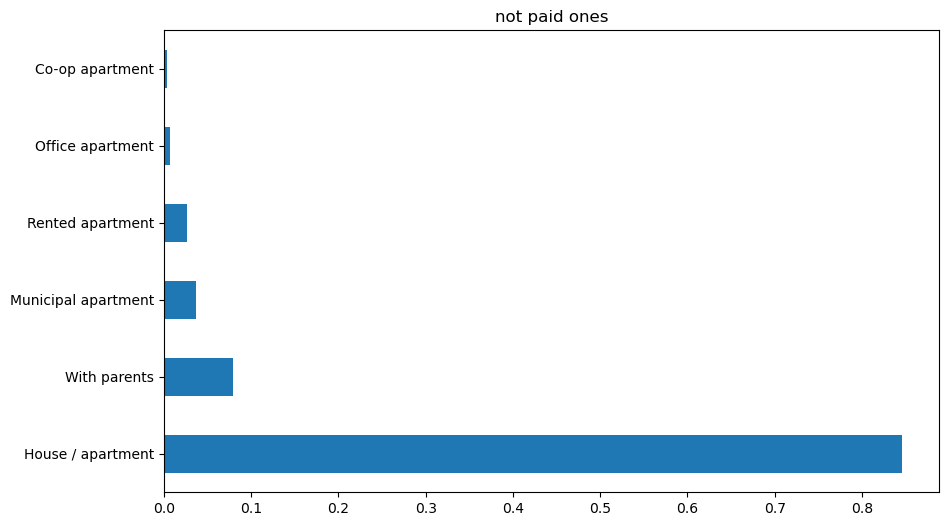

In [57]:
#This code creates a horizontal bar chart displaying the proportions of each category in NAME_HOUSING_TYPE from target_1, titled "not paid ones."
plt.figure(figsize=(10,6))
target_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.title('not paid ones')
plt.show()

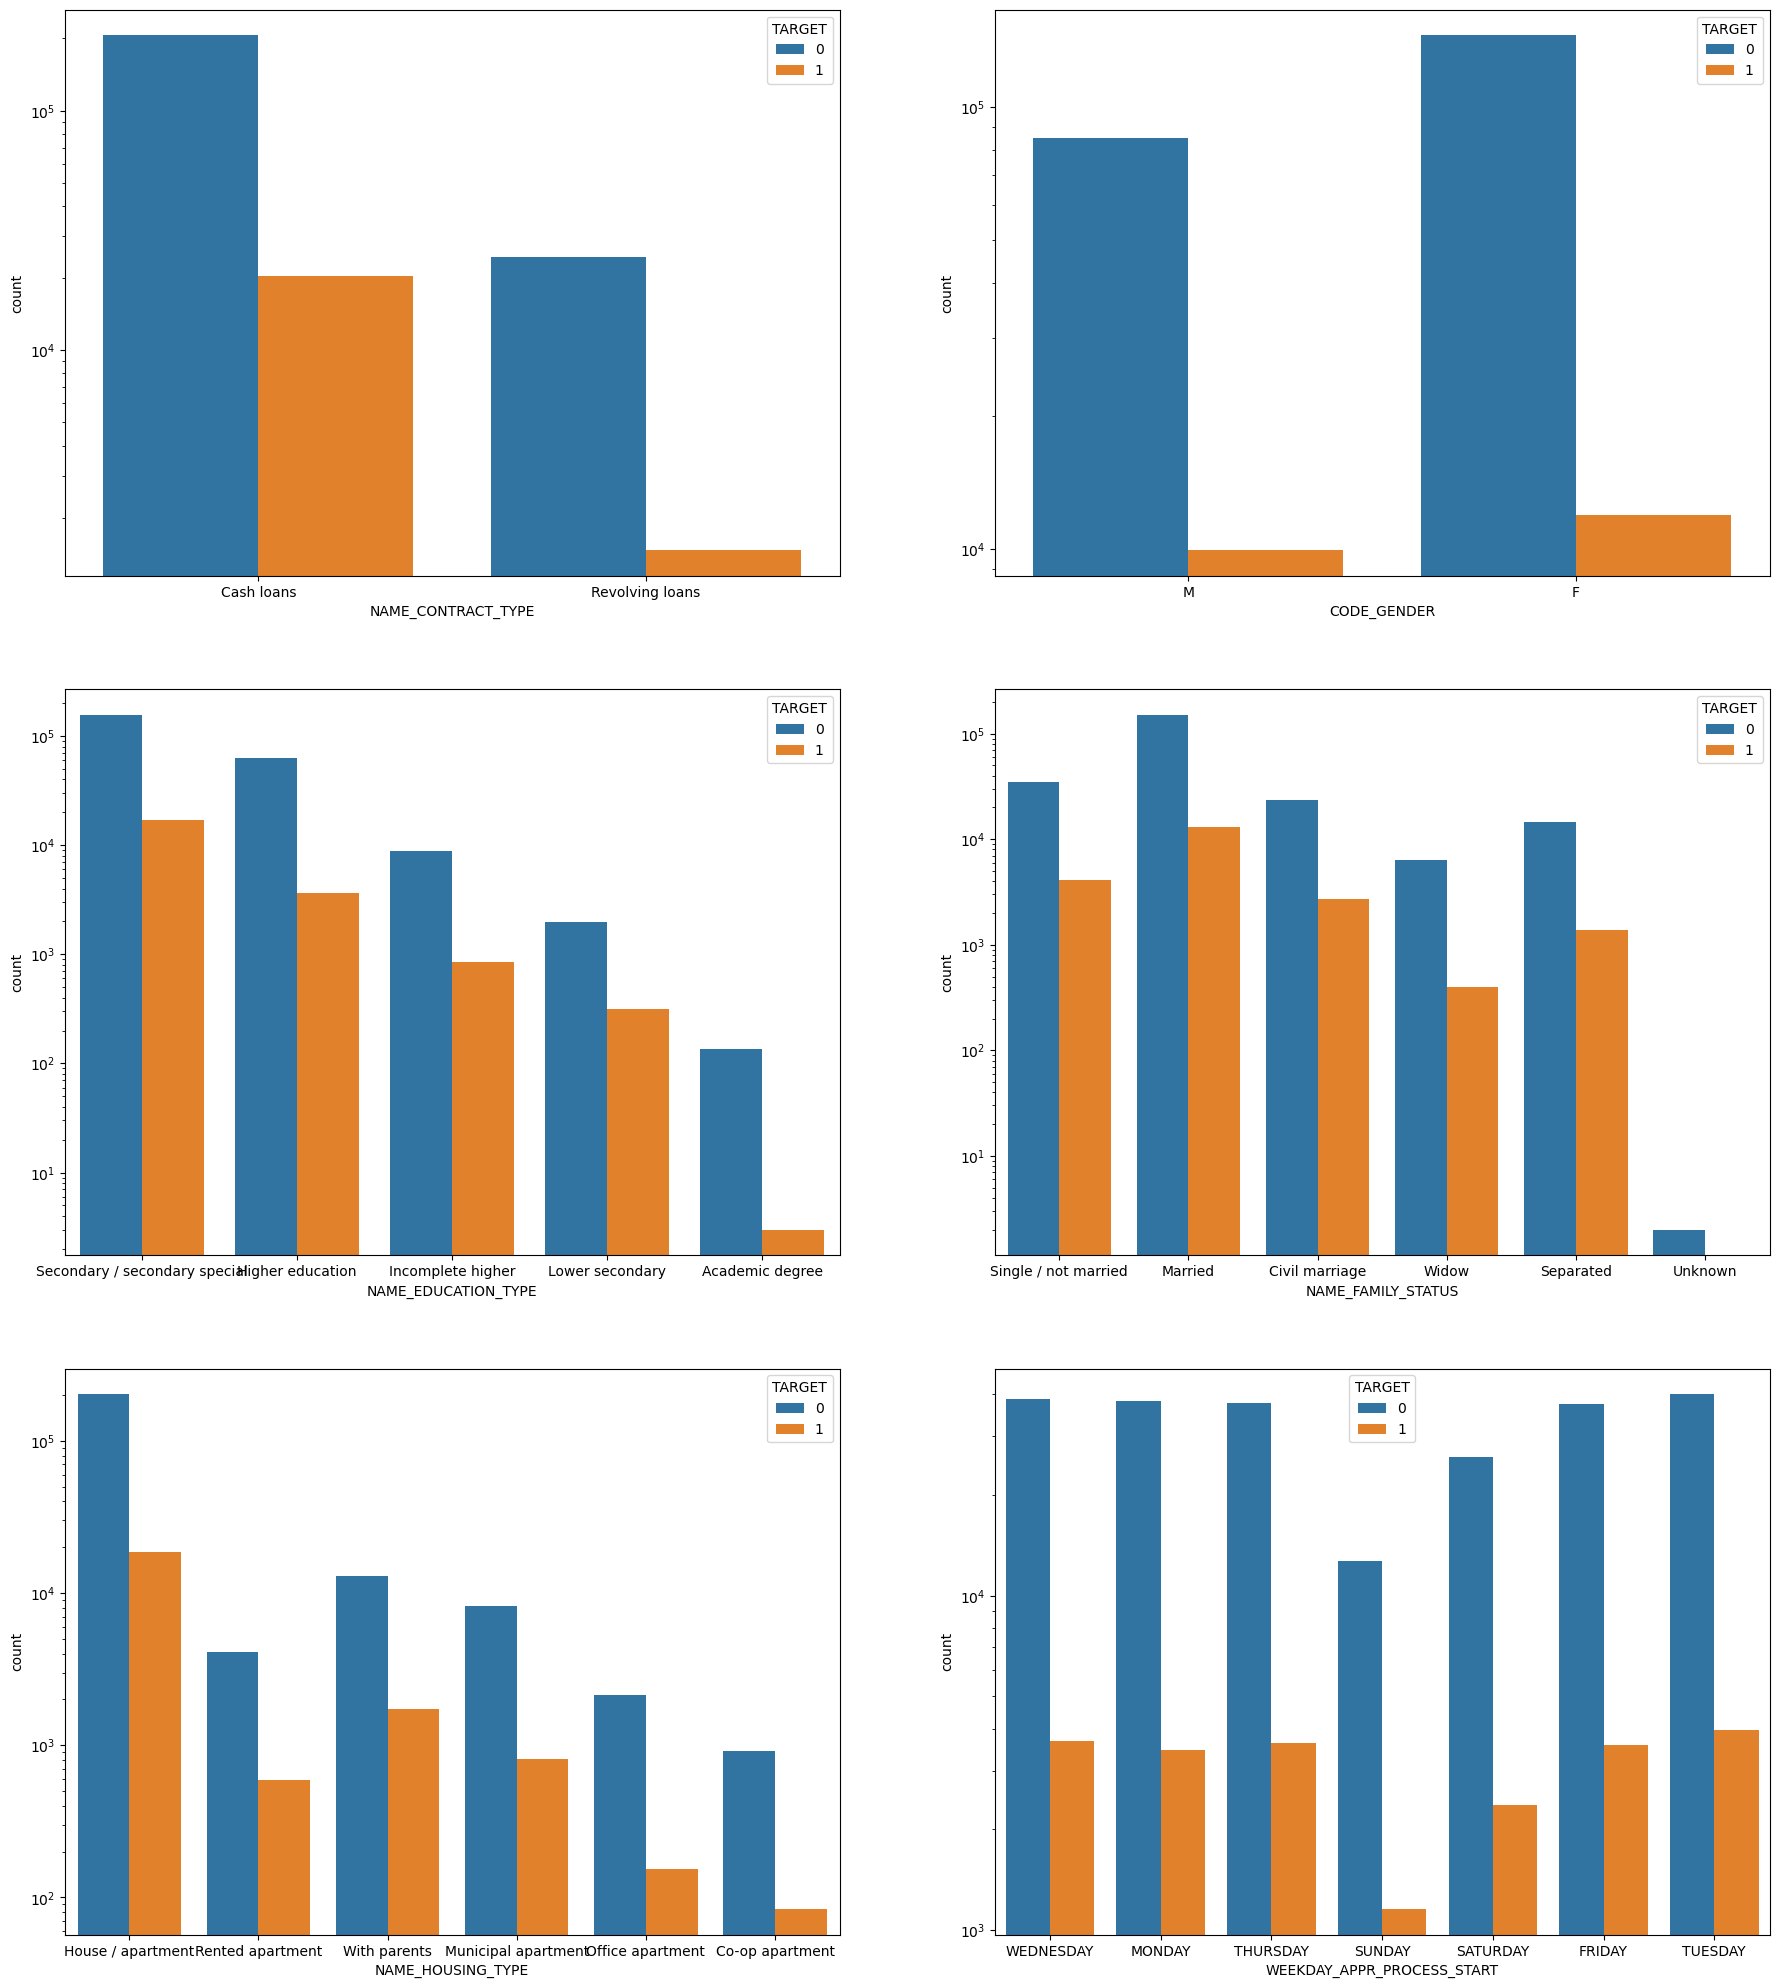

In [58]:
#considering 6 categorical columns
categorical_columns=['NAME_CONTRACT_TYPE','CODE_GENDER',
                     'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                    'WEEKDAY_APPR_PROCESS_START']

plt.figure(figsize=(22,25))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=df)
    plt.yscale('log')
    #plt.xticks(rotation=90)
plt.show()

##### Cash loans have a greater default rate (TARGET = 1) than revolving loans, but their counts differ significantly.
#### Compared to women, men seem to have a comparatively larger percentage of defaults (TARGET = 1).
#### Compared to those with an academic degree or higher education, those with lower levels of education exhibit a higher chance of default.
#### When compared to other categories, people who are single, unmarried, and separated appear to have comparatively higher default rates (TARGET = 1).
#### People who live in rental apartments and municipal apartments have greater default rates (TARGET = 1).
#### There appears to be no significant relationship between application day and default likelihood, as the default rate (TARGET = 1) appears to be fairly constant throughout the week.

### Bivariate Analysis

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       205853            24449
1                        20371             1464


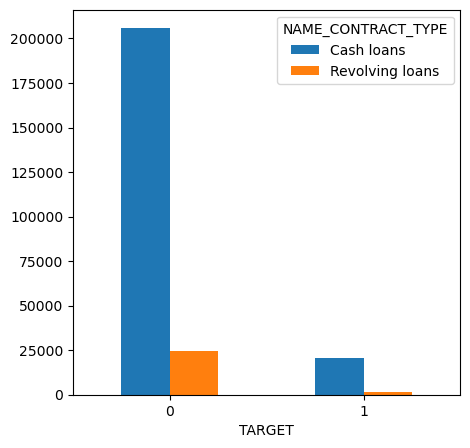

In [60]:
#High number of cash loans
tab1= pd.crosstab(index=df['TARGET'],columns=df['NAME_CONTRACT_TYPE'])
print(tab1)
tab1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

#### Revolving loans have substantially fewer defaults than cash loans, which predominate in both non-defaults and defaults. 

CODE_GENDER       F      M
TARGET                    
0            145260  85042
1             11921   9914


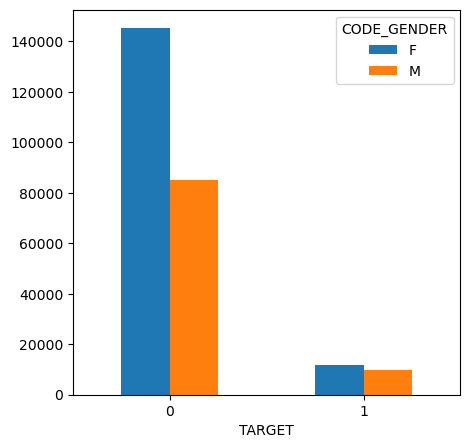

In [61]:
#Females take more loans
tab2= pd.crosstab(index=df['TARGET'],columns=df['CODE_GENDER'])
print(tab2)
tab2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()


#### In the graph as we can see female takes more loans compare to males

NAME_TYPE_SUITE  Children  Family  Group of people  Other_A  Other_B  \
TARGET                                                                 
0                    2081   29140              194      693     1318   
1                     169    2519               22       69      155   

NAME_TYPE_SUITE  Spouse, partner  Unaccompanied  
TARGET                                           
0                           8857         188019  
1                            806          18095  


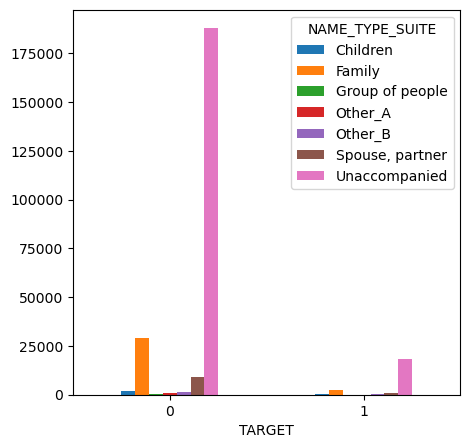

In [125]:
#Most people apply for a loan individually.
tab3= pd.crosstab(index=df['TARGET'],columns=df['NAME_TYPE_SUITE'])
print(tab3)
tab3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()


#### Unaccompained has the highest value take more loans compare to family.

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Working  
TARGET                                                        
0                        10          20454       18   143550  
1                         0           1249        0    15224  


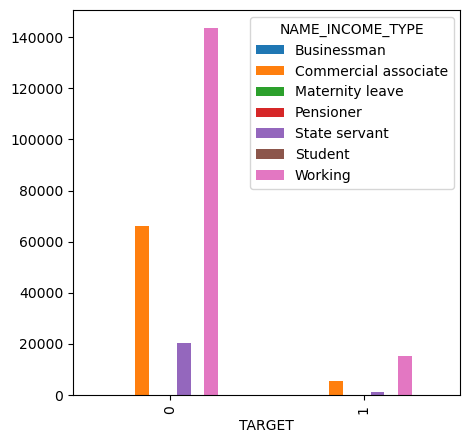

In [63]:
#Employed individuals tend to take out more loans.
tab4= pd.crosstab(index=df['TARGET'],columns=df['NAME_INCOME_TYPE'])
print(tab4)
tab4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


#### The sample is dominated by working people and business associates, however the default rates are lower for state employees and pensioners.

NAME_HOUSING_TYPE  Co-op apartment  House / apartment  Municipal apartment  \
TARGET                                                                       
0                              922             202011                 8236   
1                               84              18472                  814   

NAME_HOUSING_TYPE  Office apartment  Rented apartment  With parents  
TARGET                                                               
0                              2148              4089         12896  
1                               153               587          1725  


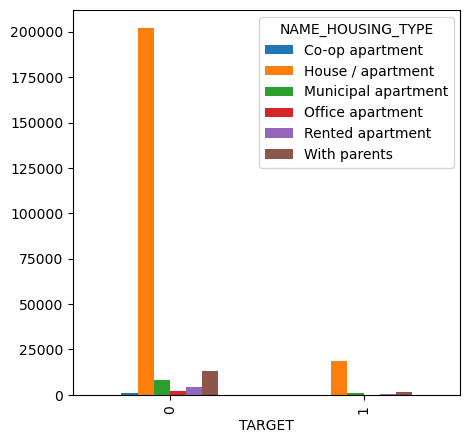

In [64]:
#Individuals who own a house or apartment.
tab5= pd.crosstab(index=df['TARGET'],columns=df['NAME_HOUSING_TYPE'])
print(tab5)
tab5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


#### The graph is dominated by house/apartment and default lower rates for municipal apartments,office apartments.

### Bivariate Numerical(continous variable analysis)

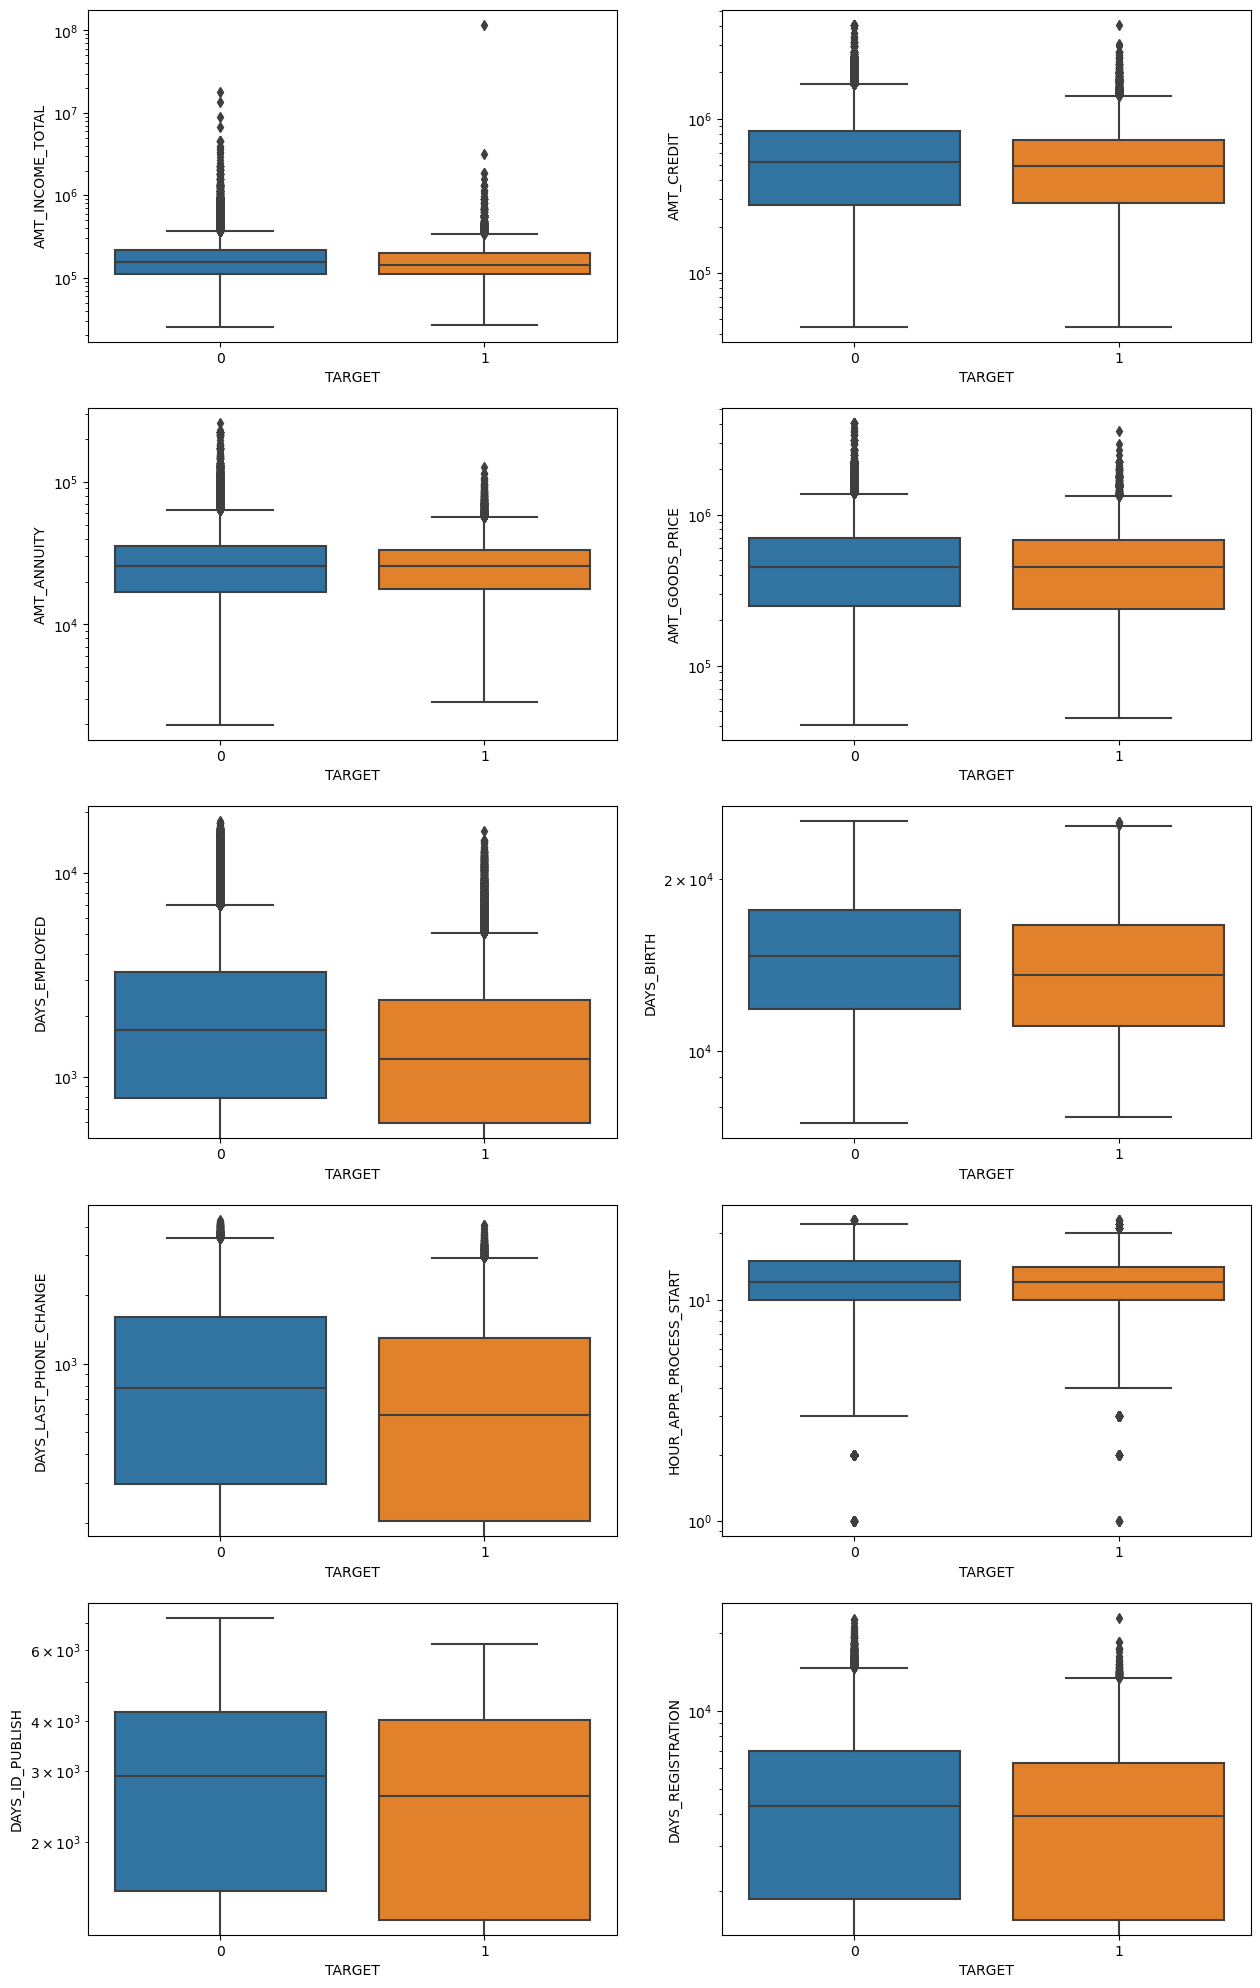

In [65]:
#This code creates box plots for multiple continuous variables, grouped by the TARGET column, with a logarithmic scale on the y-axis.
continous_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=df[i[1]].dropna(),data=df)
    plt.yscale('log')
plt.show()

### Multivariate anlysis (establishing the correlation)

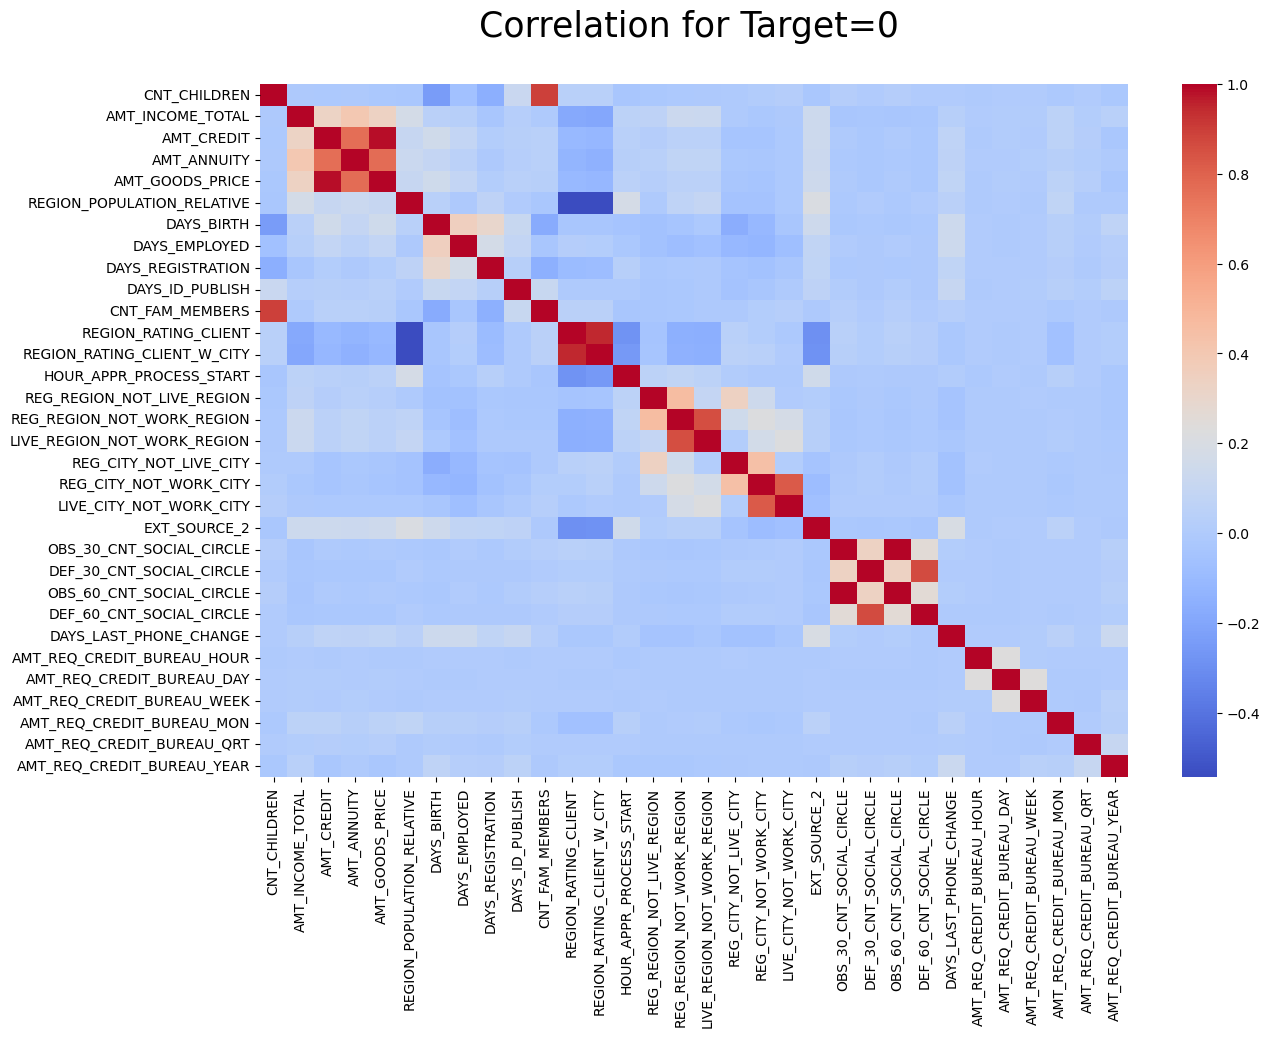

In [66]:
# Calculating the correlation among the target_0 people

target_0_corr = target_0.iloc[0:, 2:].corr()
plt.figure(figsize=[14,9])
sns.heatmap(target_0_corr, annot=False, cmap='coolwarm')
plt.title('Correlation for Target=0 \n', fontsize=25)
plt.show()

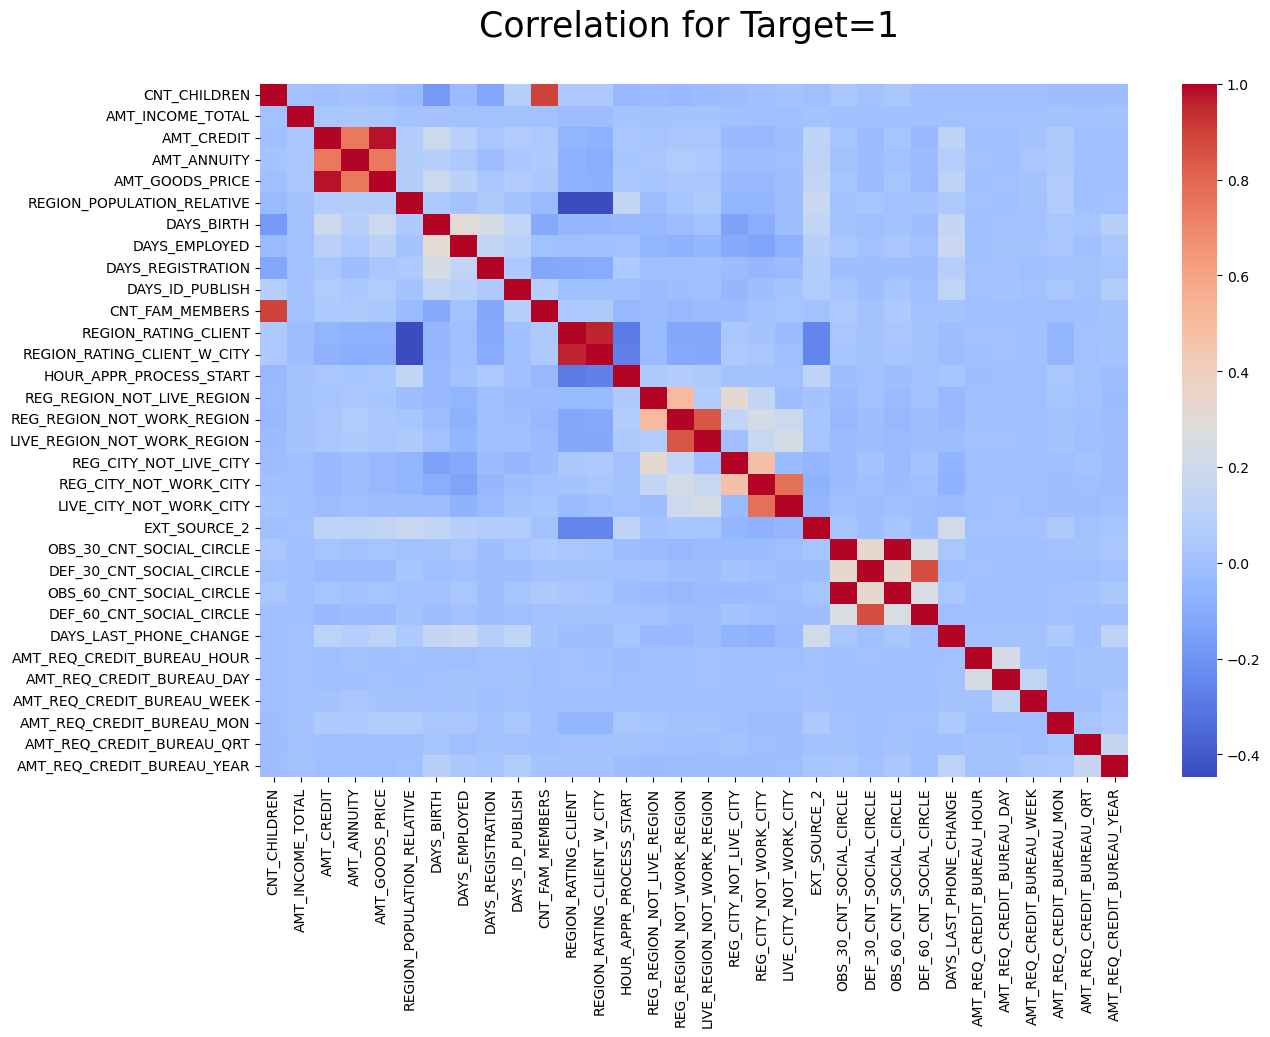

In [126]:
# Calculating the correlation among the target_1 people

target_1_corr = target_1.iloc[0:, 2:].corr()
plt.figure(figsize=[14,9])
sns.heatmap(target_1_corr, annot=False, cmap='coolwarm')
plt.title('Correlation for Target=1 \n', fontsize=25)
plt.show()

## Previous application Data Analysis 

In [67]:
# Second dataset
df2=pd.read_csv('previous_application.csv')


In [68]:
df2.shape # shape of the dataset

(1670214, 37)

In [ ]:
df2.info() #Information of datatype and col of the data

## Data Cleaning

In [71]:
df2.isnull().sum() #checking for missing values

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [72]:
#To remove the dataset which is having more than 19% of the missing values
df2=df2.loc[:,df2.isna().mean()<=.19] 
len(df2.columns)

23

In [73]:
df2.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [74]:
#This code provides summary statistics for the PRODUCT_COMBINATION column in the df2 DataFrame.
df2['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [75]:
# counts the occurrences of each unique value in the PRODUCT_COMBINATION column of the df2 DataFrame.
df2['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [76]:
# fills any missing (NaN) values in the PRODUCT_COMBINATION column of the df2 DataFrame with the value 'Cash'.
df2['PRODUCT_COMBINATION'].fillna(value='Cash',inplace=True)

In [77]:
# It calculates the median value of the AMT_CREDIT column in the df2 DataFrame.
df2['AMT_CREDIT'].median()

80541.0

In [78]:
#fills any missing (NaN) values in the AMT_CREDIT column of the df2 DataFrame with the median value of that column.
df2['AMT_CREDIT'].fillna(df2['AMT_CREDIT'].median(),inplace=True)

In [79]:
# This code calculates and prints the percentage of 'XNA' and 'XAP' values in each column of the df2 DataFrame.
for column in df2.columns:
    xna_percentage = df2[column].isin(['XNA', 'XAP']).mean() * 100
    print(f"{column}: {xna_percentage:.2f}%")

SK_ID_PREV: 0.00%
SK_ID_CURR: 0.00%
NAME_CONTRACT_TYPE: 0.02%
AMT_APPLICATION: 0.00%
AMT_CREDIT: 0.00%
WEEKDAY_APPR_PROCESS_START: 0.00%
HOUR_APPR_PROCESS_START: 0.00%
FLAG_LAST_APPL_PER_CONTRACT: 0.00%
NFLAG_LAST_APPL_IN_DAY: 0.00%
NAME_CASH_LOAN_PURPOSE: 95.83%
NAME_CONTRACT_STATUS: 0.00%
DAYS_DECISION: 0.00%
NAME_PAYMENT_TYPE: 37.56%
CODE_REJECT_REASON: 81.33%
NAME_CLIENT_TYPE: 0.12%
NAME_GOODS_CATEGORY: 56.93%
NAME_PORTFOLIO: 22.29%
NAME_PRODUCT_TYPE: 63.68%
CHANNEL_TYPE: 0.00%
SELLERPLACE_AREA: 0.00%
NAME_SELLER_INDUSTRY: 51.23%
NAME_YIELD_GROUP: 30.97%
PRODUCT_COMBINATION: 0.00%


In [80]:
#identifies columns in df2 where more than 50% of the values are 'XNA' or 'XAP'.
cut_off=50
cols_to_Drop=list(df2.columns[100*df2.isin(['XNA', 'XAP']).mean()>cut_off])
print(cols_to_Drop,len(cols_to_Drop))

['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY'] 5


In [81]:
#to drop the values because most of the data are null .
df2.drop(columns=cols_to_Drop, inplace=True)

In [82]:
#for checking the percentage of  'XNA' or 'XAP' in df2.
for column in df2.columns:
    xna_percentage = df2[column].isin(['XNA', 'XAP']).mean() * 100
    print(f"{column}: {xna_percentage:.2f}%")

SK_ID_PREV: 0.00%
SK_ID_CURR: 0.00%
NAME_CONTRACT_TYPE: 0.02%
AMT_APPLICATION: 0.00%
AMT_CREDIT: 0.00%
WEEKDAY_APPR_PROCESS_START: 0.00%
HOUR_APPR_PROCESS_START: 0.00%
FLAG_LAST_APPL_PER_CONTRACT: 0.00%
NFLAG_LAST_APPL_IN_DAY: 0.00%
NAME_CONTRACT_STATUS: 0.00%
DAYS_DECISION: 0.00%
NAME_PAYMENT_TYPE: 37.56%
NAME_CLIENT_TYPE: 0.12%
NAME_PORTFOLIO: 22.29%
CHANNEL_TYPE: 0.00%
SELLERPLACE_AREA: 0.00%
NAME_YIELD_GROUP: 30.97%
PRODUCT_COMBINATION: 0.00%


In [87]:
#replaces all occurrences of "XNA" in the NAME_CONTRACT_TYPE column of the df2 DataFrame with the value "Cash loans"
df2["NAME_CONTRACT_TYPE"].replace(to_replace=["XNA"], value="Cash loans", inplace=True)

In [88]:
#ounts the occurrences of each unique value in the NAME_CONTRACT_TYPE column of the df2 DataFrame.
df2["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [89]:
# Replacing the masked null values with mode value
df2["NAME_PAYMENT_TYPE"].replace(to_replace=["XNA"], value="Cash through the bank", inplace=True)

In [90]:
#ounts the occurrences of each unique value in the NAME_PAYMENT_TYPE column of the df2 DataFrame.
df2["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        1660936
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [91]:
#replaces all occurrences of "XNA" in the NAME_CLIENT_TYPE column of the df2 DataFrame with the value "Repeater"
df2["NAME_CLIENT_TYPE"].replace(to_replace=["XNA"], value="Repeater",inplace=True)

In [92]:
# displays the occurrences of each unique value in the NAME_CLIENT_TYPE column of the df2 DataFrame.
df2["NAME_CLIENT_TYPE"].value_counts()

Repeater     1233202
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [93]:
#displays the occurrences of each unique value in the NAME_PORTFOLIO column of the df2 DataFrame.
df2["NAME_PORTFOLIO"].value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [94]:
#replaces all occurrences of "XNA" in the NAME_CLIENT_TYPE column of the df2 DataFrame with the value "POS"
df2["NAME_PORTFOLIO"].replace(to_replace=["XNA"], value="POS",inplace=True)

In [95]:
#displays the occurrences of each unique value in the NAME_PORTFOLIO column of the df2 DataFrame.
df2["NAME_PORTFOLIO"].value_counts()

POS      1063241
Cash      461563
Cards     144985
Cars         425
Name: NAME_PORTFOLIO, dtype: int64

In [96]:
##displays the occurrences of each unique value in the NAME_YIELD_GROUP  column of the df2 DataFrame.
df2["NAME_YIELD_GROUP"].value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [97]:
#replaces all occurrences of "XNA" in the NAME_YIELD_GROUP column of the df2 DataFrame with the value "middle"
df2["NAME_YIELD_GROUP"].replace("XNA", "middle", inplace=True)

In [98]:
##displays the occurrences of each unique value in the NAME_YIELD_GROUP column of the df2 DataFrame.
df2["NAME_YIELD_GROUP"].value_counts()

middle        902747
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

In [99]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0            -73  Cash through the bank         Repeater            POS   
1           -164  Cash through the bank         Repeater           Cash   
2           -301  Cash through the bank         Repeater           Cash   
3           -512  Cash through the bank         Repeater           Cash   
4           -781  Cash through the bank         Repeater           Cash   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_YIELD_GROUP  \
0             Country-wide                35           middle   
1           Contact center                -1       low_action   
2  Credit and cash offices                -1             high   
3  Credit and cash offices                -1           middle   
4  Credit and cash offices                -1             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

In [100]:
df2.shape

(1670214, 18)

### converting the negative values to positive

In [101]:
df2['DAYS_DECISION']=df2['DAYS_DECISION'].abs()
df2['SELLERPLACE_AREA']=df2['SELLERPLACE_AREA'].abs()

In [102]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             73  Cash through the bank         Repeater            POS   
1            164  Cash through the bank         Repeater           Cash   
2            301  Cash through the bank         Repeater           Cash   
3            512  Cash through the bank         Repeater           Cash   
4            781  Cash through the bank         Repeater           Cash   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_YIELD_GROUP  \
0             Country-wide                35           middle   
1           Contact center                 1       low_action   
2  Credit and cash offices                 1             high   
3  Credit and cash offices                 1           middle   
4  Credit and cash offices                 1             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high

In [103]:
#checking the shape
df.shape

(252137, 45)

In [104]:
# identifies all categorical columns in the df2 DataFrame 
cat_cols=list(df2.dtypes[df2.dtypes=='object'].index)
df2[cat_cols].head()

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0     Consumer loans                   SATURDAY                           Y   
1         Cash loans                   THURSDAY                           Y   
2         Cash loans                    TUESDAY                           Y   
3         Cash loans                     MONDAY                           Y   
4         Cash loans                   THURSDAY                           Y   

  NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0             Approved  Cash through the bank         Repeater            POS   
1             Approved  Cash through the bank         Repeater           Cash   
2             Approved  Cash through the bank         Repeater           Cash   
3             Approved  Cash through the bank         Repeater           Cash   
4              Refused  Cash through the bank         Repeater           Cash   

              CHANNEL_TYPE NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0             Country-wide           middle  POS mobile with interest  
1           Contact center       low_action          Cash X-Sell: low  
2  Credit and cash offices             high         Cash X-Sell: high  
3  Credit and cash offices           middle       Cash X-Sell: middle  
4  Credit and cash offices             high         Cash Street: high

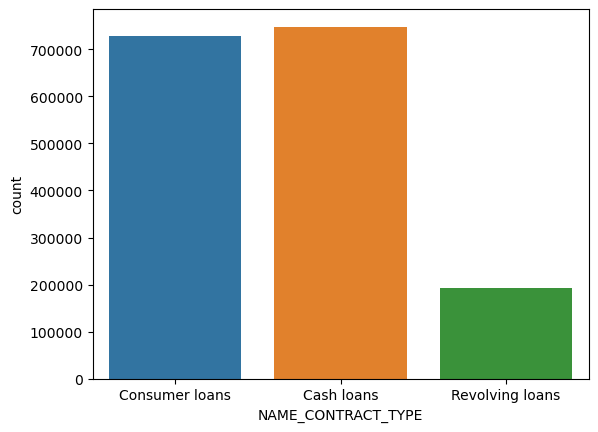

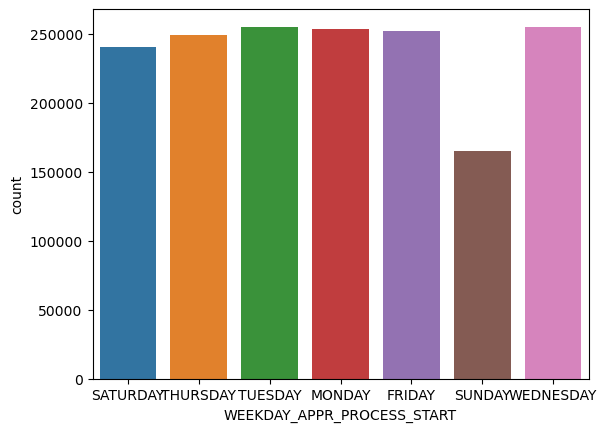

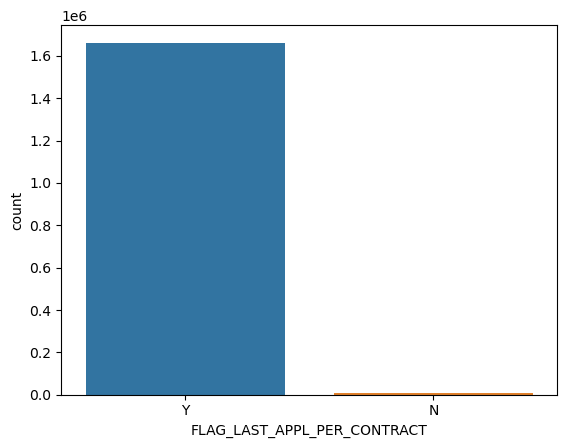

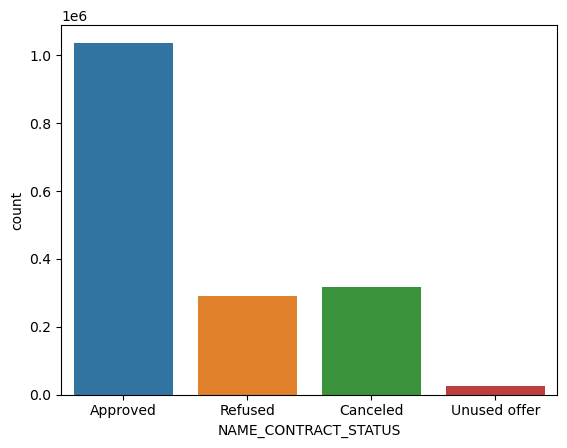

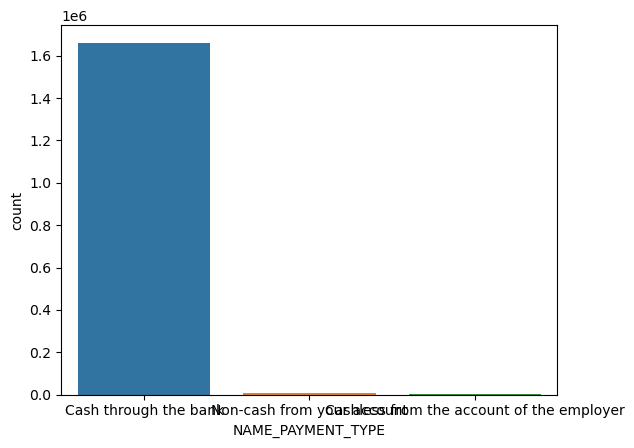

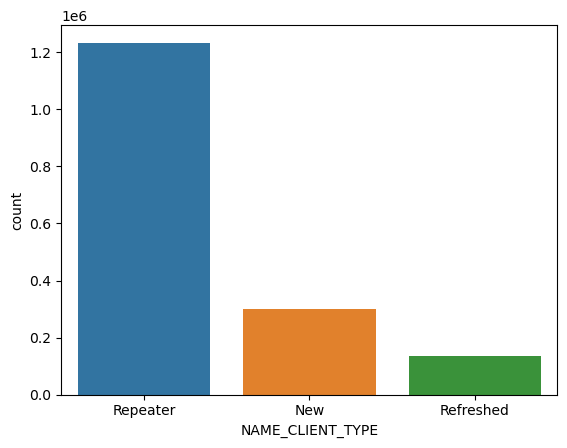

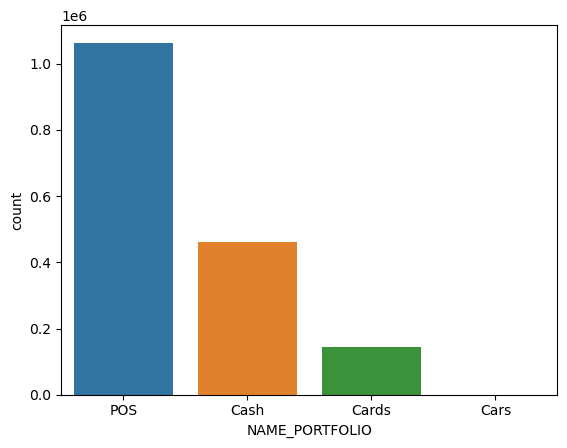

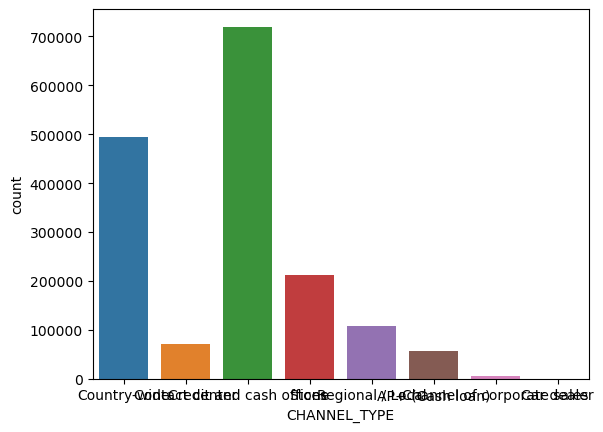

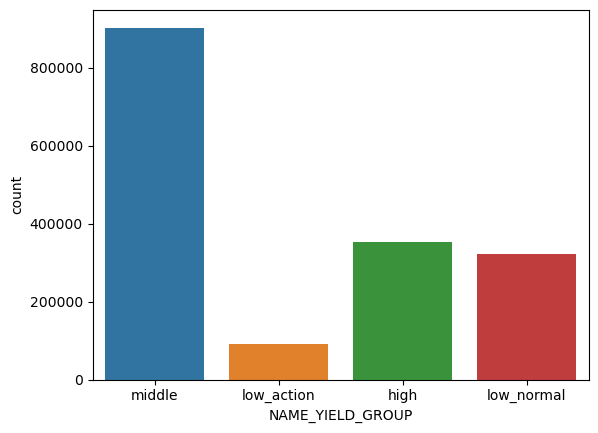

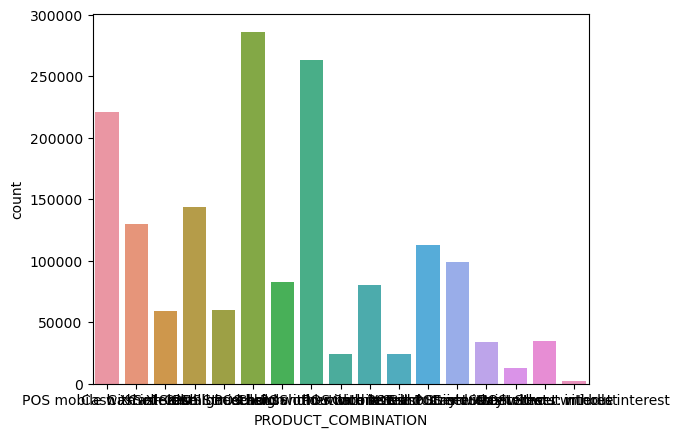

In [105]:
#plotting the countplot for categoricol columns
for col in cat_cols:
    sns.countplot(x=df2[col])
    plt.show()

In [106]:
# identifies all numerical columns in the df2 DataFrame 
num_cols=list(df2.dtypes[df2.dtypes!='object'].index)
df2[num_cols].head()

SK_ID_PREV  SK_ID_CURR  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877          17145.0     17145.0   
1     2802425      108129         607500.0    679671.0   
2     2523466      122040         112500.0    136444.5   
3     2819243      176158         450000.0    470790.0   
4     1784265      202054         337500.0    404055.0   

   HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
0                       15                       1             73   
1                       11                       1            164   
2                       11                       1            301   
3                        7                       1            512   
4                        9                       1            781   

   SELLERPLACE_AREA  
0                35  
1                 1  
2                 1  
3                 1  
4                 1

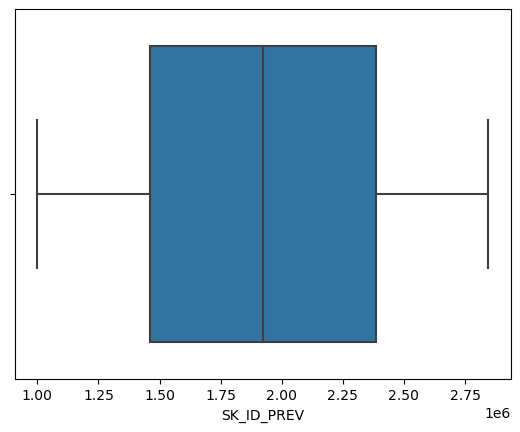

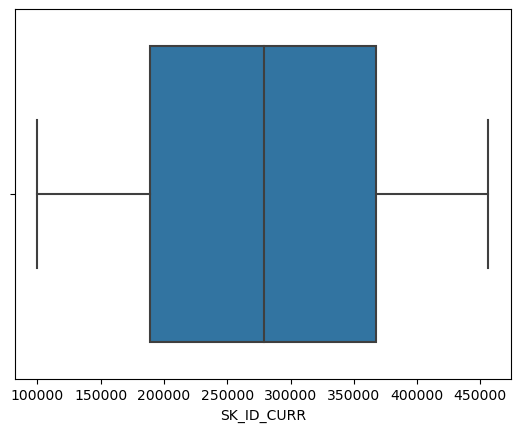

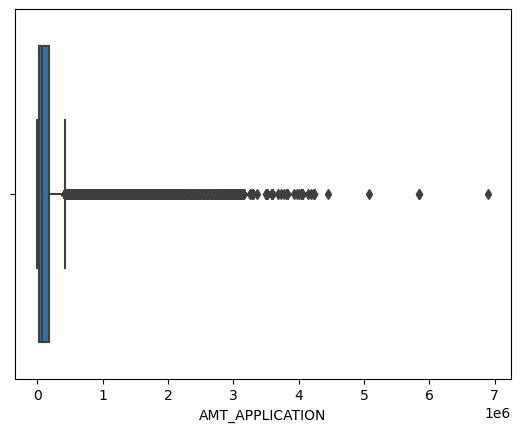

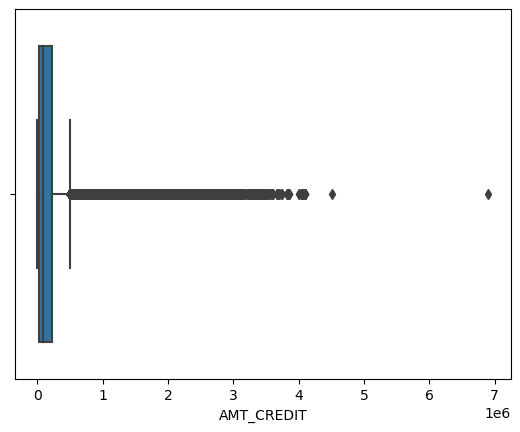

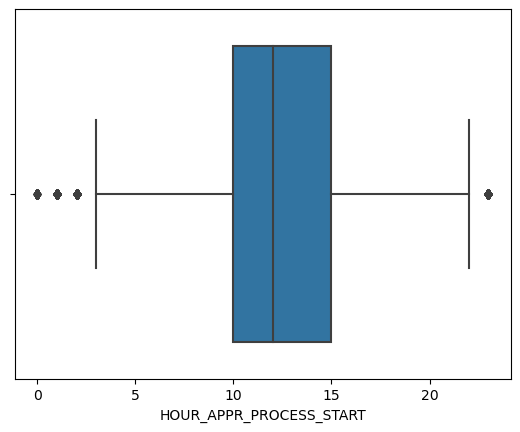

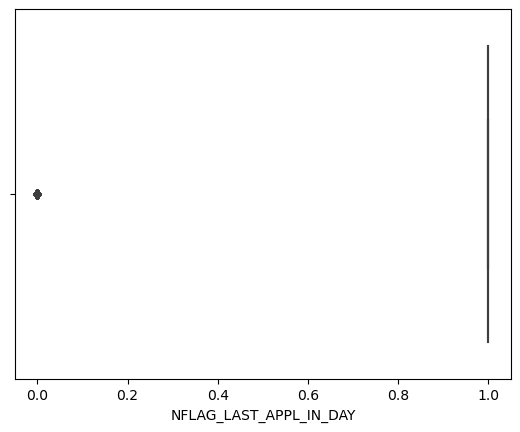

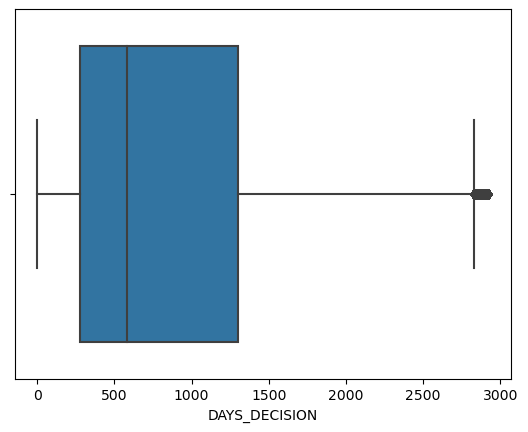

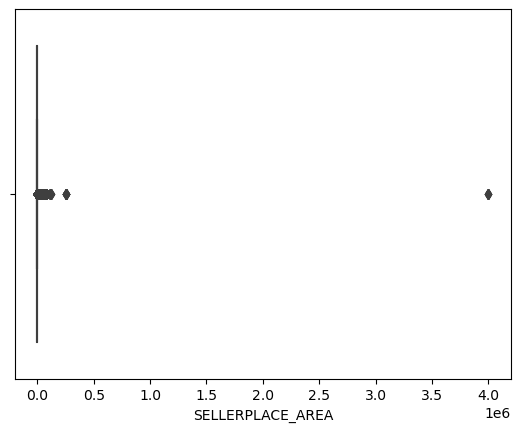

In [107]:
#plotting the boxplot for all the numerical columns 
for col in num_cols:
    sns.boxplot(x=df2[col])
    plt.show()

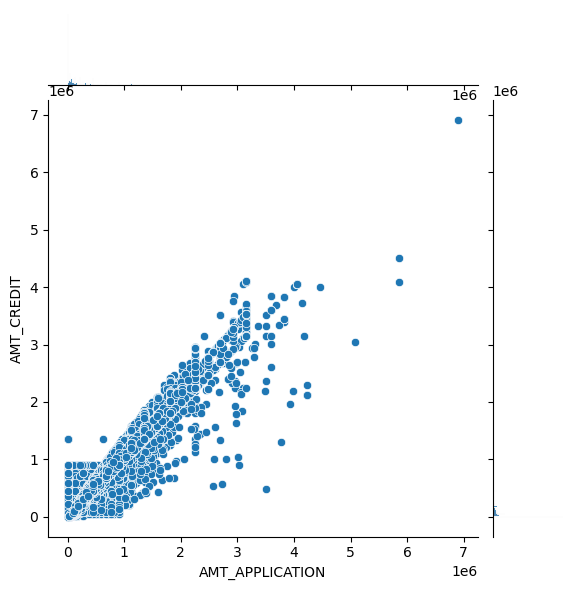

In [108]:
#joint plot to visualize the relationship between the AMT_APPLICATION and AMT_CREDIT.
sns.jointplot(data=df2,x='AMT_APPLICATION',y='AMT_CREDIT')
#there is an outlier

#### There is a linear dependency between AMT_CREDIT and AMT_APPLICATION with some outlier

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='AMT_CREDIT'>

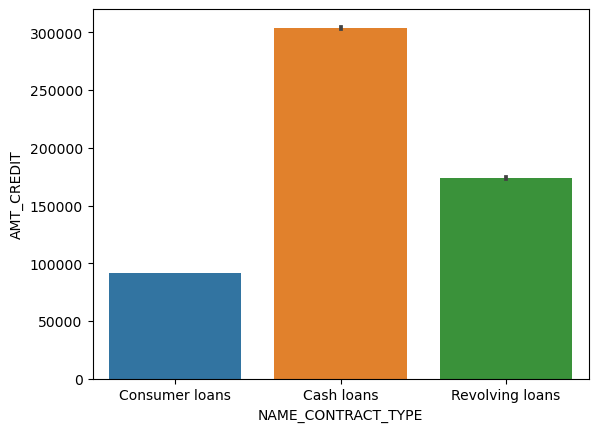

In [109]:
#To visualize the realtionship between NAME_CONTRACT_TYPE and AMT_CREDIT.
sns.barplot(data=df2,x='NAME_CONTRACT_TYPE',y='AMT_CREDIT')


#### cash loans highest

### Multivariate Analysis for pervious application data

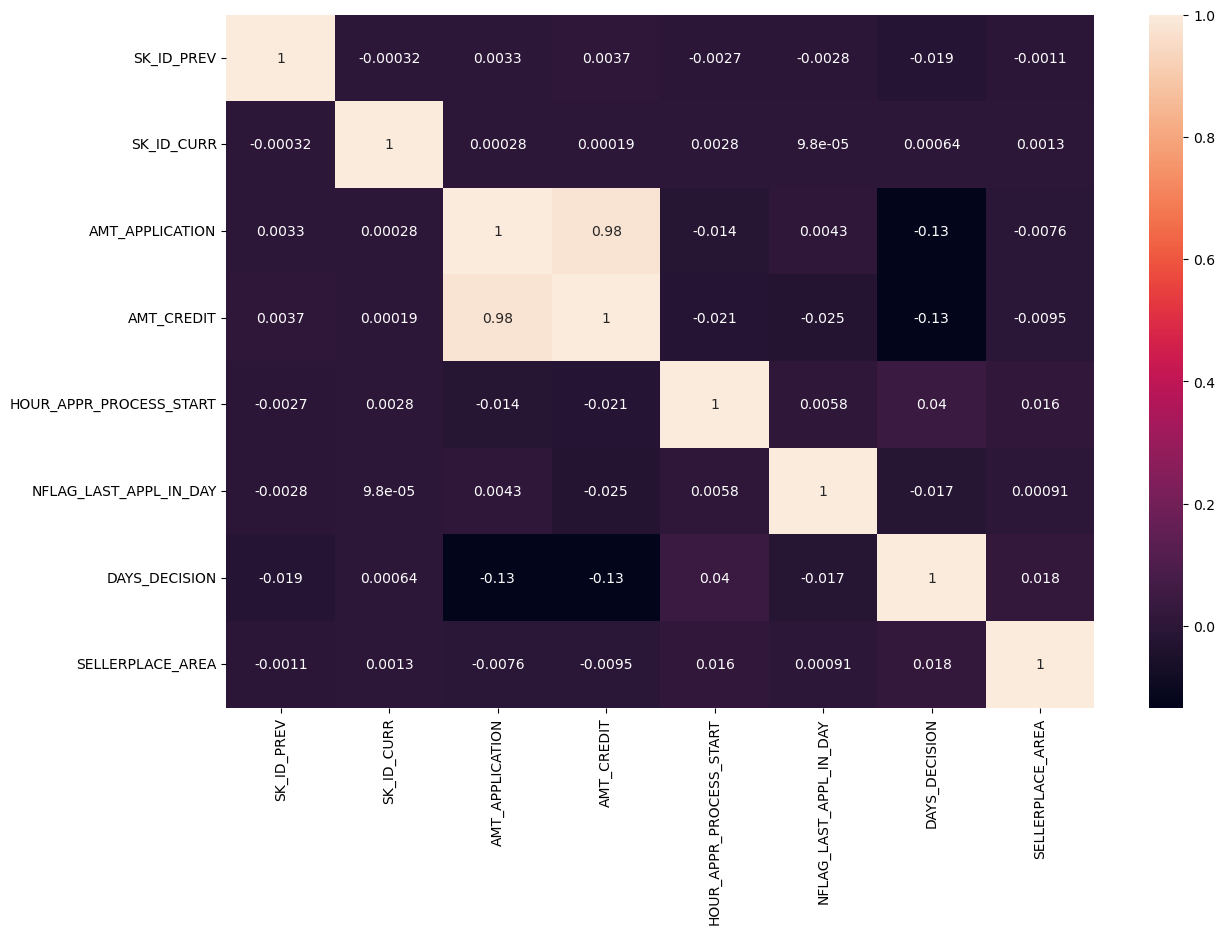

In [111]:
plt.figure(figsize=[14,9])
sns.heatmap( df2.corr(), annot= True)
plt.show()

### Merging the application and previous Data

In [112]:
#Performing a left join ensures that all rows from the application data are retained.
#This approach allows us to include historical application data for each applicant.
#Using an inner join would result in losing data for new customers without any previous records.
#The current data will be duplicated based on the number of times it appears in the historical application data.
#Keeping these considerations in mind, we proceed with the left join.

merging_frames=pd.merge(df,df2,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))
merging_frames.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_Current CODE_GENDER  CNT_CHILDREN  \
0      100002       1                 Cash loans           M             0   
1      100003       0                 Cash loans           F             0   
2      100003       0                 Cash loans           F             0   
3      100003       0                 Cash loans           F             0   
4      100004       0            Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_Current  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0            406597.5      24700.5         351000.0   
1          270000.0           1293502.5      35698.5        1129500.0   
2          270000.0           1293502.5      35698.5        1129500.0   
3          270000.0           1293502.5      35698.5        1129500.0   
4           67500.0            135000.0       6750.0         135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637               3648             2120   
1       16765           1188               1186              291   
2       16765           1188               1186              291   
3       16765           1188               1186              291   
4       19046            225               4260             2531   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                1                     2                            2   
1                2                     1                            1   
2                2                     1                            1   
3                2                     1                            1   
4                1                     2                            2   

  WEEKDAY_APPR_PROCESS_START_Current  HOUR_APPR_PROCESS_START_Current  \
0                          WEDNESDAY                               10   
1                             MONDAY                               11   
2                             MONDAY                               11   
3                             MONDAY                               11   
4                             MONDAY                                9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School  

In [113]:
#checking the shape of the data after merging two data frames
merging_frames.shape

(1153787, 62)

#### Univariate Analysis , since we have removed all the missing values there is no need check for that again

#### Categorical analysis

In [114]:
#This code identifies all categorical columns (of type 'object') in the merging_frames DataFrame and displays the first few rows of those columns.
cat_cols=list(merging_frames.dtypes[merging_frames.dtypes=='object'].index)
merging_frames[cat_cols].head()

NAME_CONTRACT_TYPE_Current CODE_GENDER NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0                 Cash loans           M   Unaccompanied          Working   
1                 Cash loans           F          Family    State servant   
2                 Cash loans           F          Family    State servant   
3                 Cash loans           F          Family    State servant   
4            Revolving loans           M   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  WEEKDAY_APPR_PROCESS_START_Current       ORGANIZATION_TYPE  \
0                          WEDNESDAY  Business Entity Type 3   
1                             MONDAY                  School   
2                             MONDAY                  School   
3                             MONDAY                  School   
4                             MONDAY              Government   

  NAME_CONTRACT_TYPE_Previous WEEKDAY_APPR_PROCESS_START_Previous  \
0              Consumer loans                            SATURDAY   
1                  Cash loans                              FRIDAY   
2              Consumer loans                              SUNDAY   
3              Consumer loans                            SATURDAY   
4              Consumer loans                              FRIDAY   

  FLAG_LAST_APPL_PER_CONTRACT NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
0                           Y             Approved  Cash through the bank   
1                           Y             Approved  Cash through the bank   
2                           Y             Approved  Cash through the bank   
3                           Y             Approved  Cash through the bank   
4                           Y             Approved  Cash through the bank   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE NAME_YIELD_GROUP  \
0              New            POS                    Stone       low_normal   
1         Repeater           Cash  Credit and cash offices       low_normal   
2        Refreshed            POS                    Stone           middle   
3        Refreshed            POS             Country-wide           middle   
4              New            POS         Regional / Local           middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest

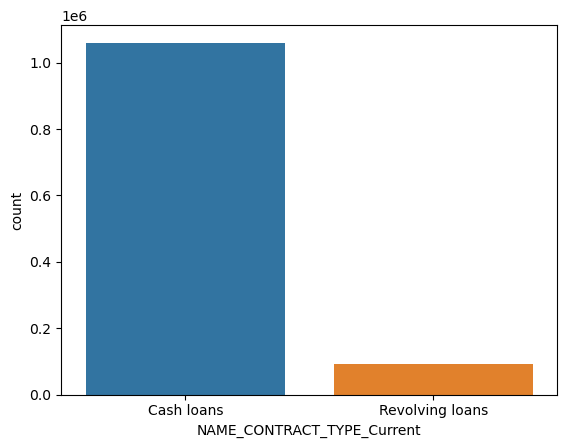

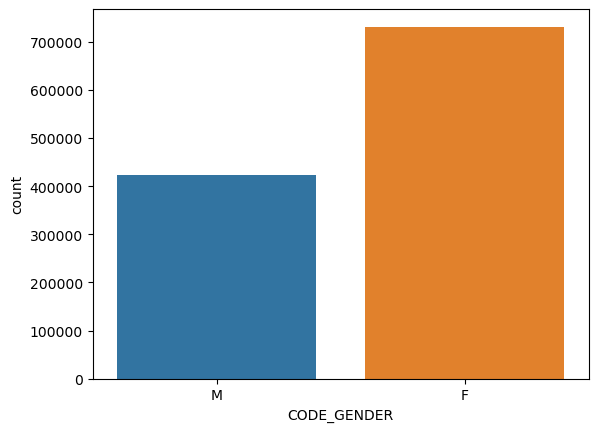

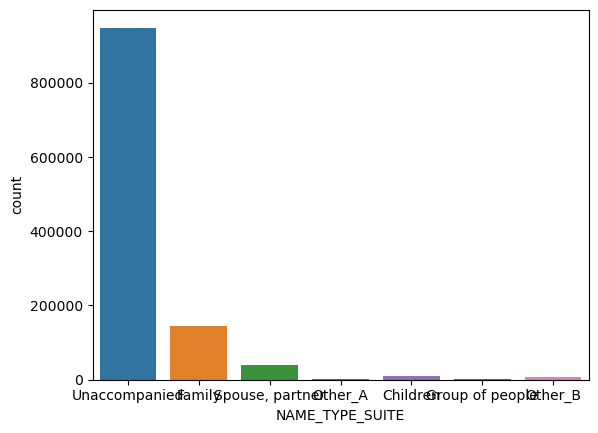

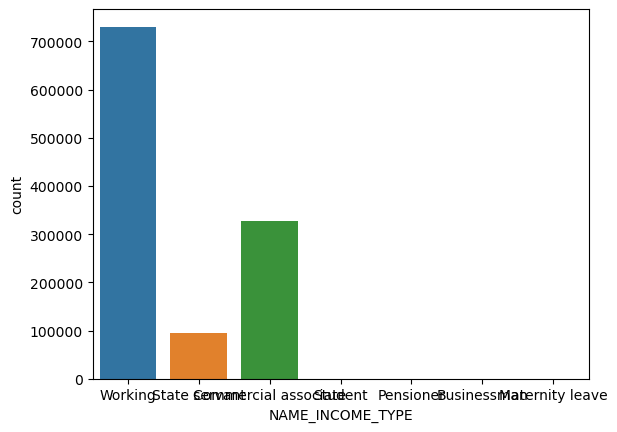

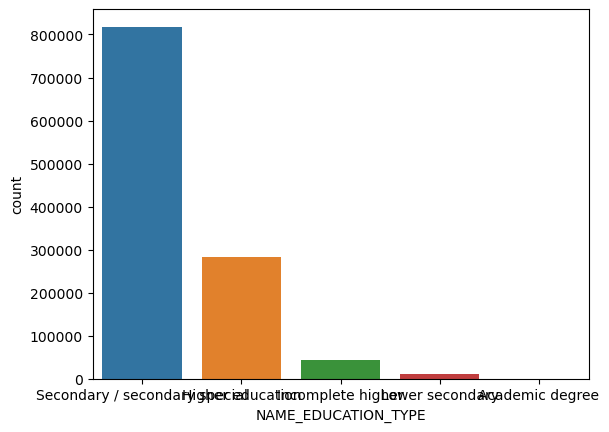

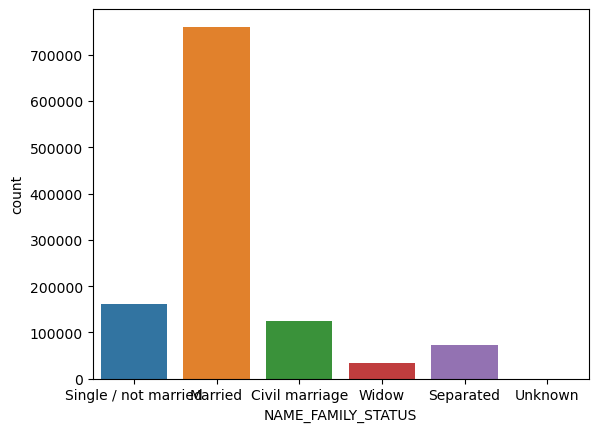

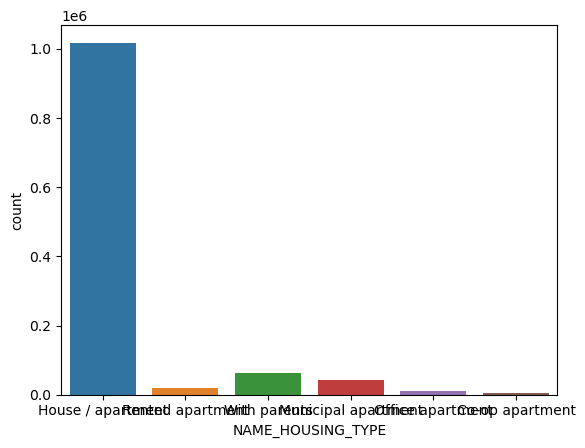

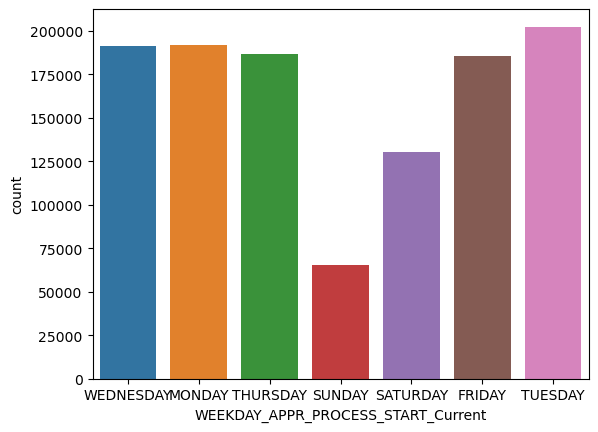

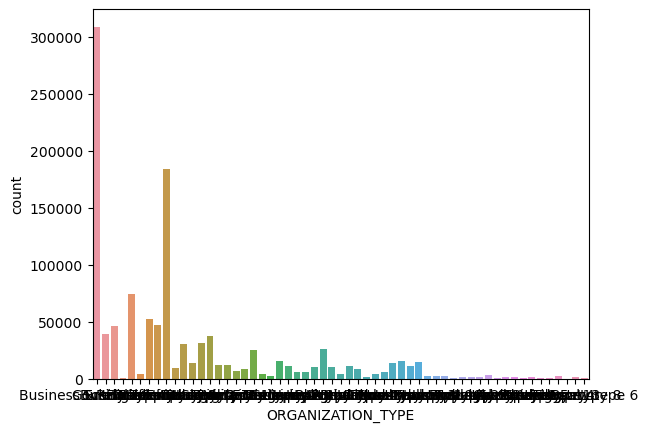

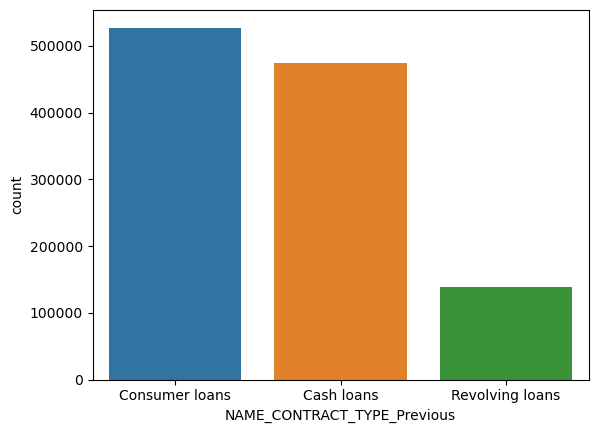

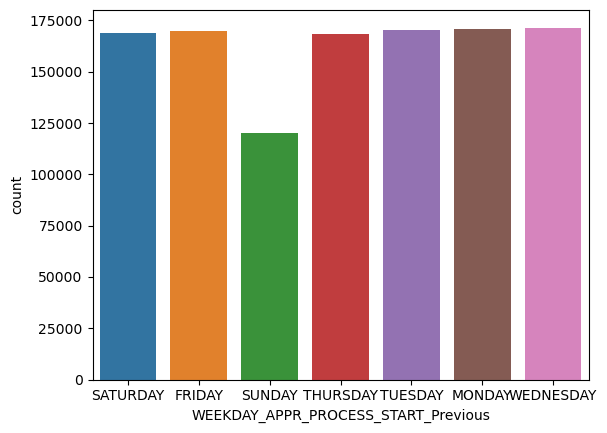

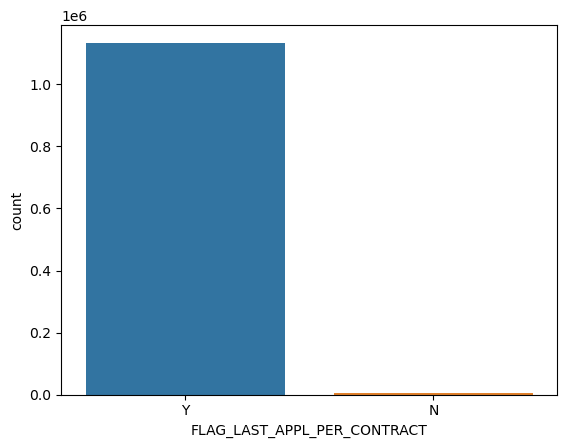

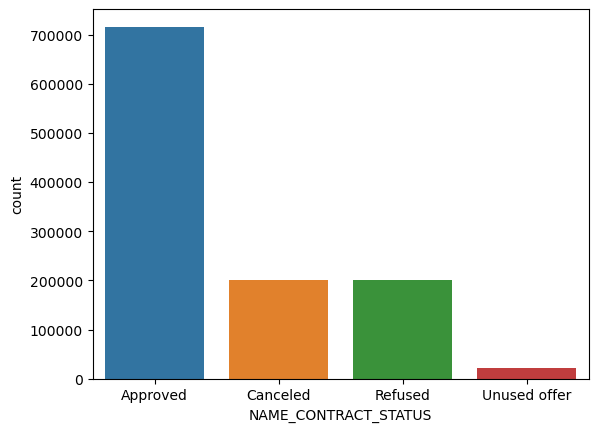

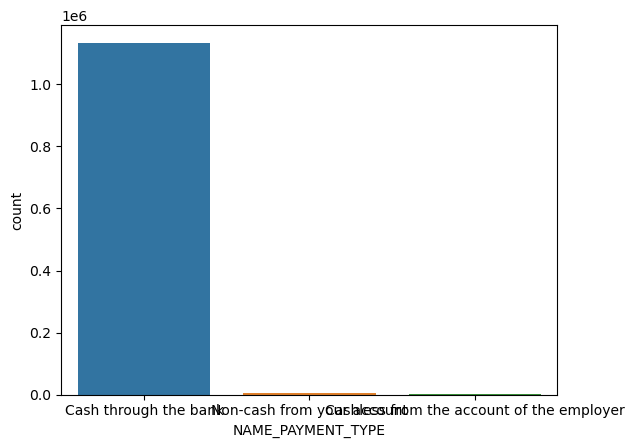

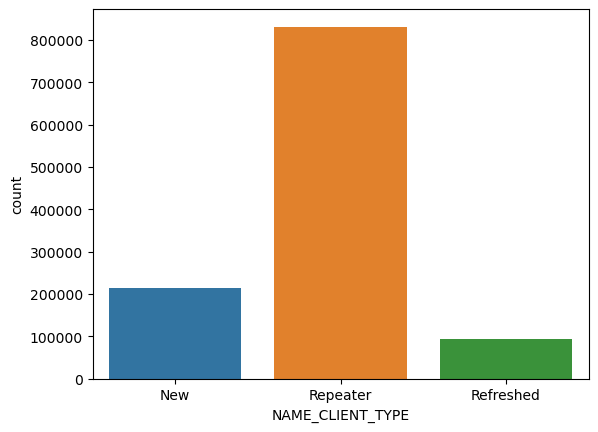

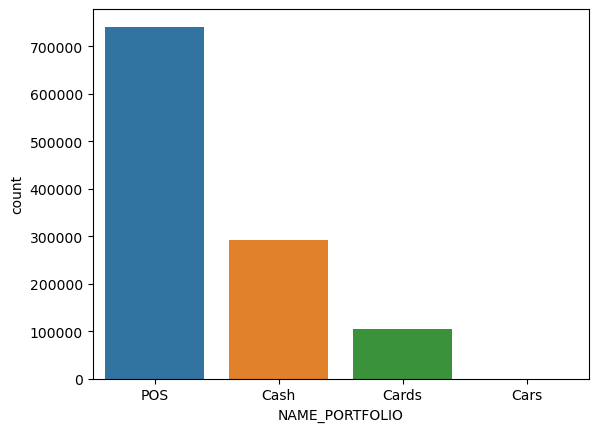

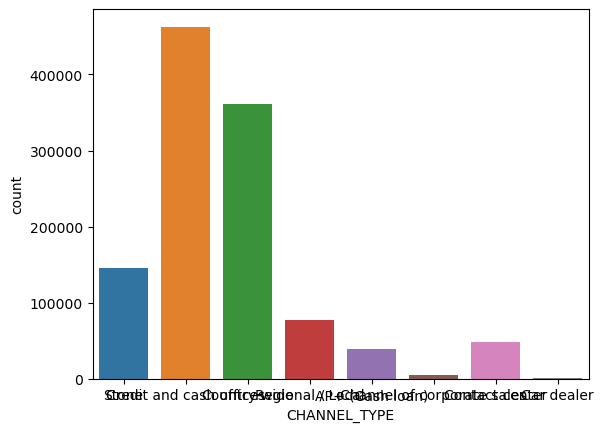

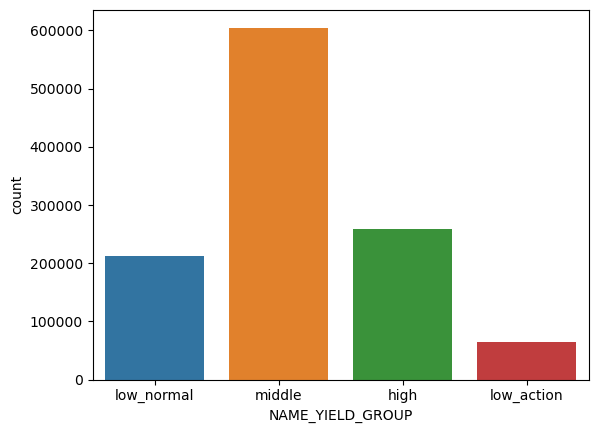

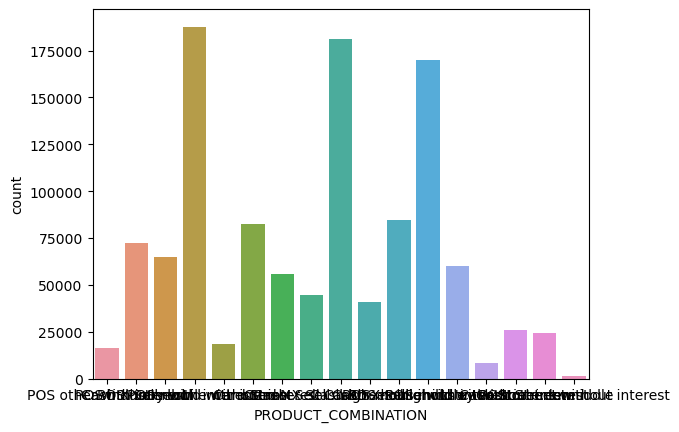

In [115]:
# It displays count plots for each categorical column in cat_cols to visualize their frequency distribution.
for col in cat_cols:
    sns.countplot(x=merging_frames[col])
    plt.show()

In [116]:
# It identifies all numerical columns in the merging_frames DataFrame and displays the first few rows of these columns.
num_cols=list(merging_frames.dtypes[merging_frames.dtypes!='object'].index)
merging_frames[num_cols].head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_Current  \
0      100002       1             0          202500.0            406597.5   
1      100003       0             0          270000.0           1293502.5   
2      100003       0             0          270000.0           1293502.5   
3      100003       0             0          270000.0           1293502.5   
4      100004       0             0           67500.0            135000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801        9461   
1      35698.5        1129500.0                    0.003541       16765   
2      35698.5        1129500.0                    0.003541       16765   
3      35698.5        1129500.0                    0.003541       16765   
4       6750.0         135000.0                    0.010032       19046   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0            637               3648             2120                1   
1           1188               1186              291                2   
2           1188               1186              291                2   
3           1188               1186              291                2   
4            225               4260             2531                1   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   HOUR_APPR_PROCESS_START_Current  REG_REGION_NOT_LIVE_REGION  \
0                               10                           0   
1                               11                           0   
2                               11                           0   
3                               11                           0   
4                                9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.262949                         2                         2   
1      0.622246                         1                         0   
2      0.622246                         1                         0   
3      0.622246                         1                         0   
4      0.555912                         0                         0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                         2                         2                  1134.0   
1                         1                         0                   828.0   
2                         1                         0                   828.0   
3                         1                         0                   828.0   
4                         0                         0                   815.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   
1                           0           

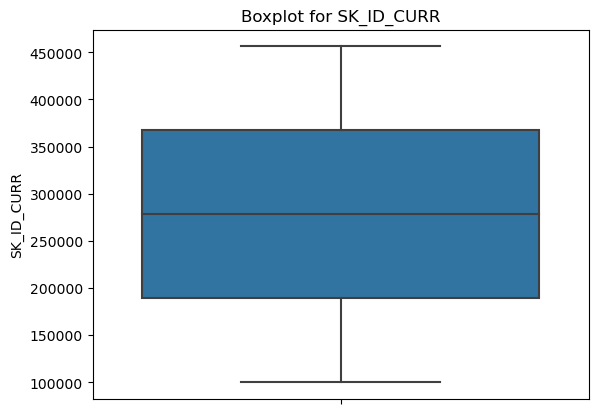

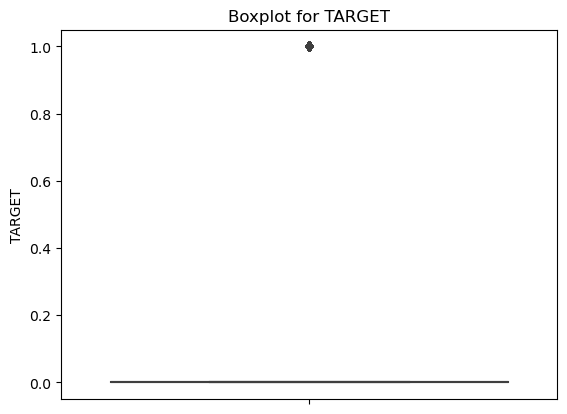

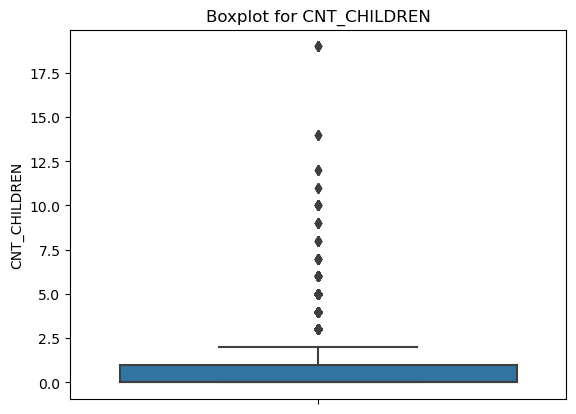

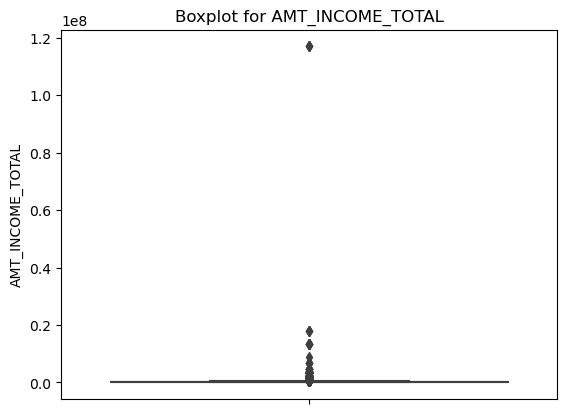

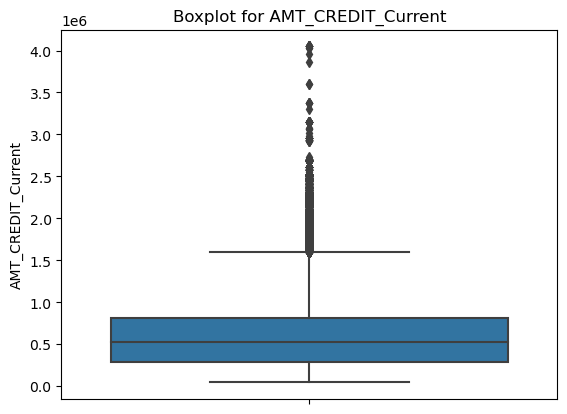

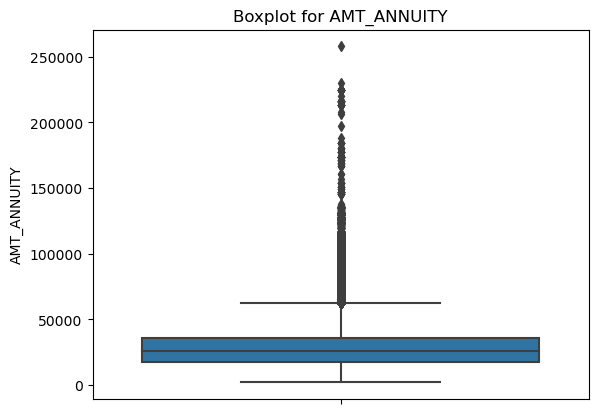

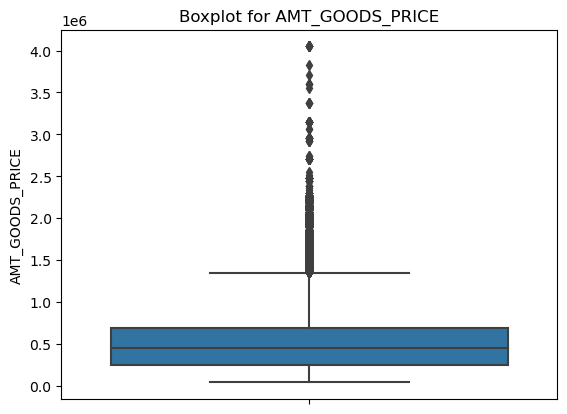

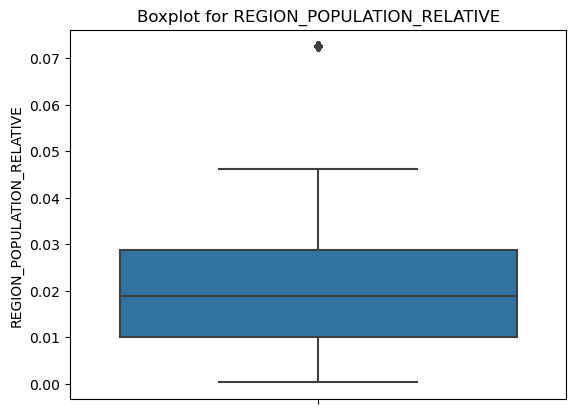

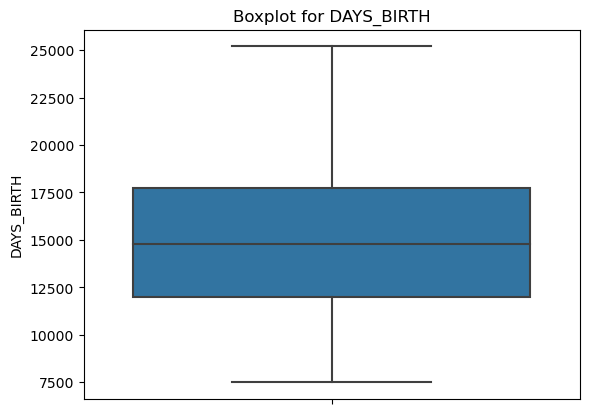

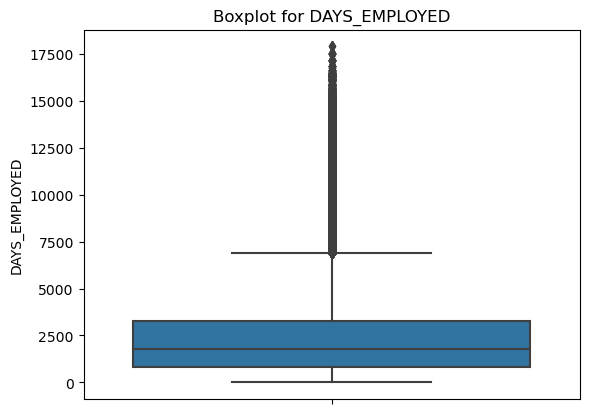

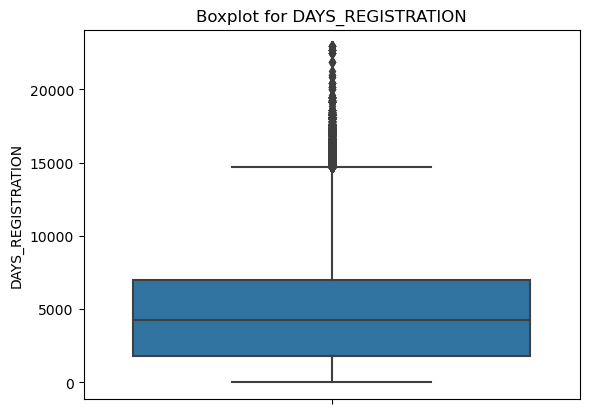

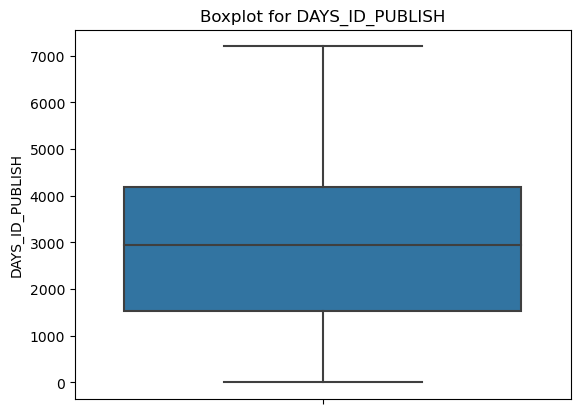

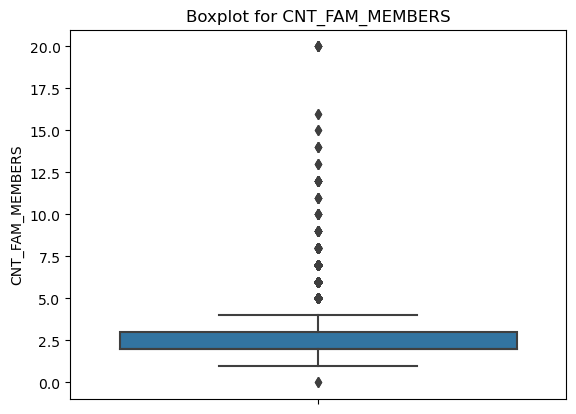

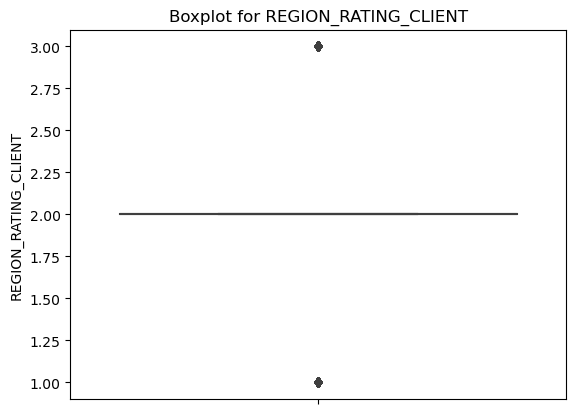

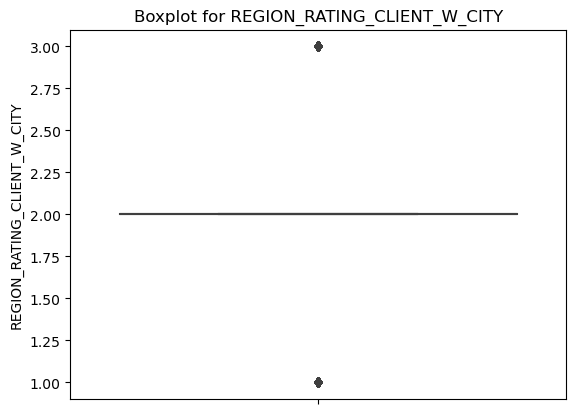

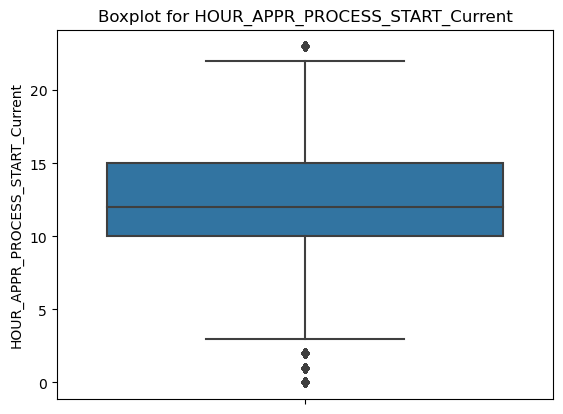

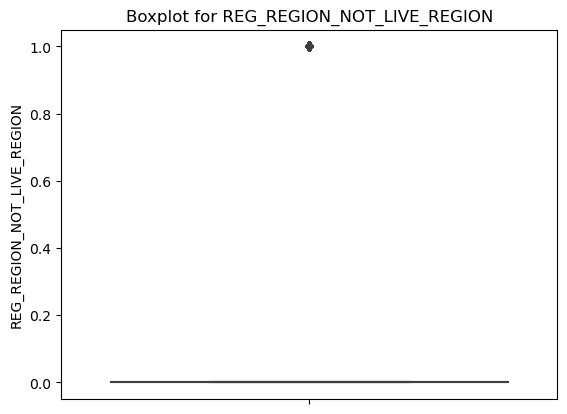

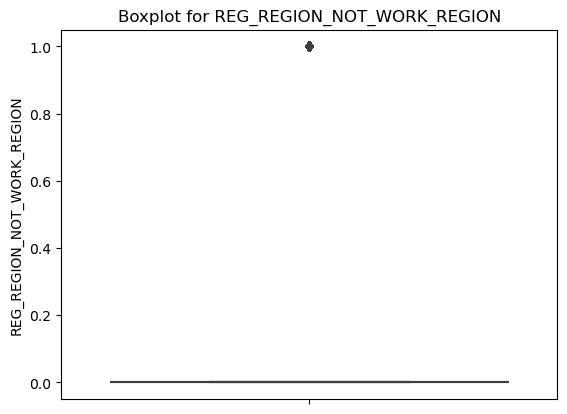

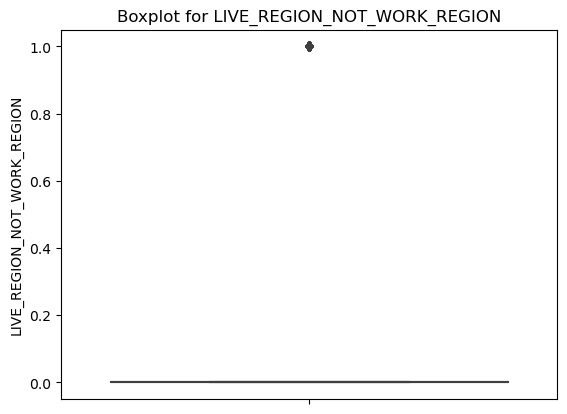

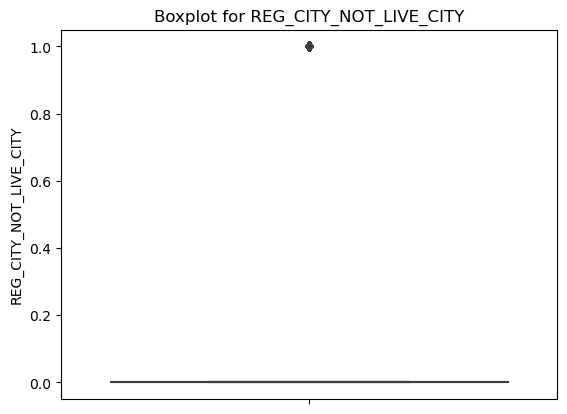

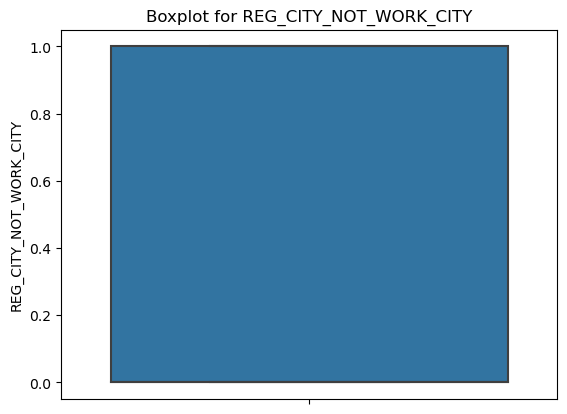

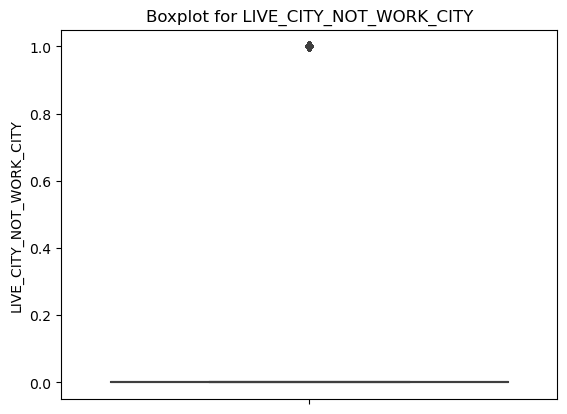

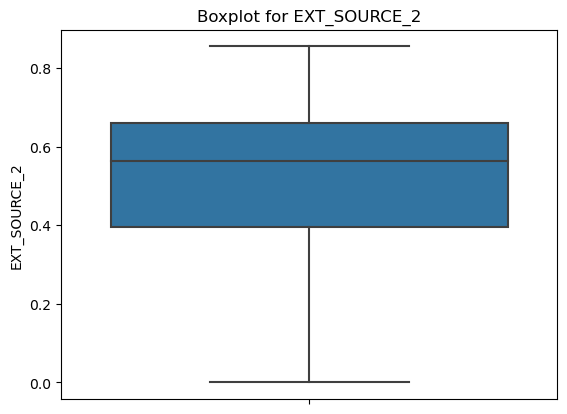

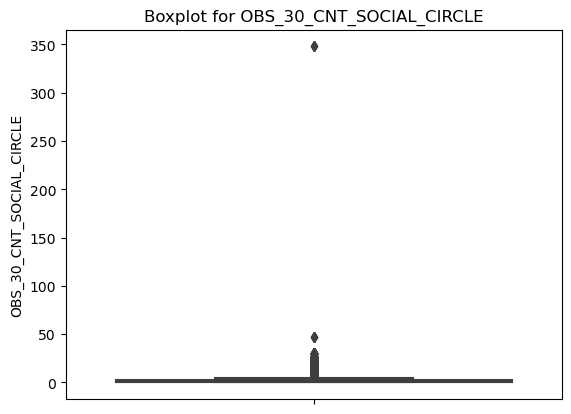

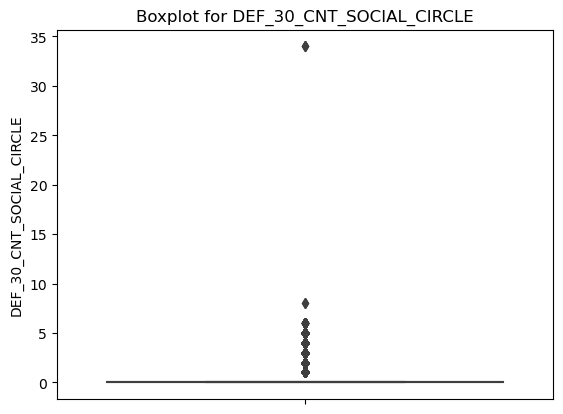

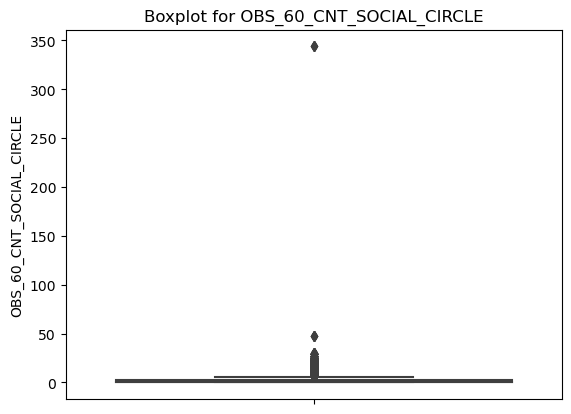

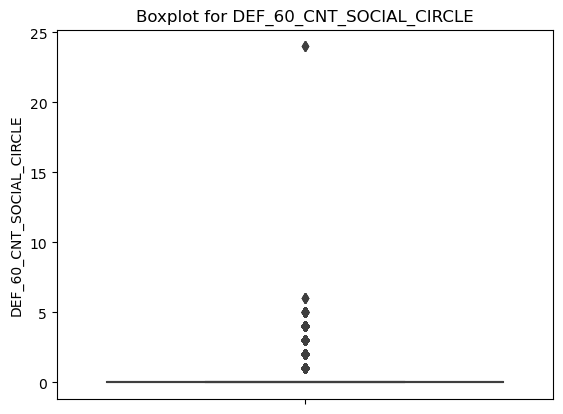

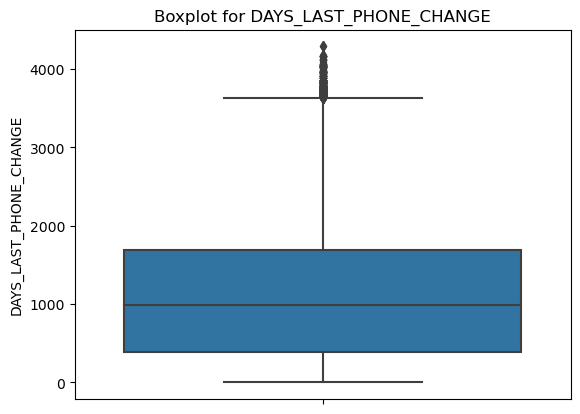

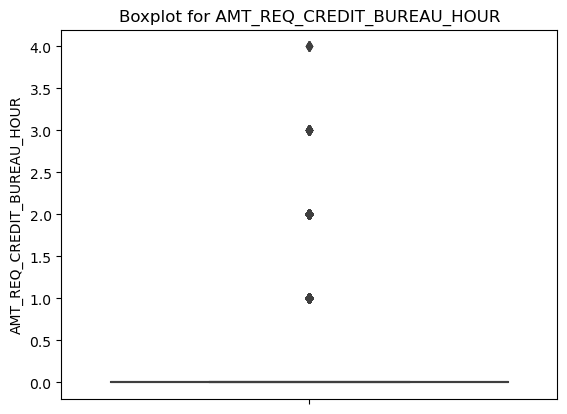

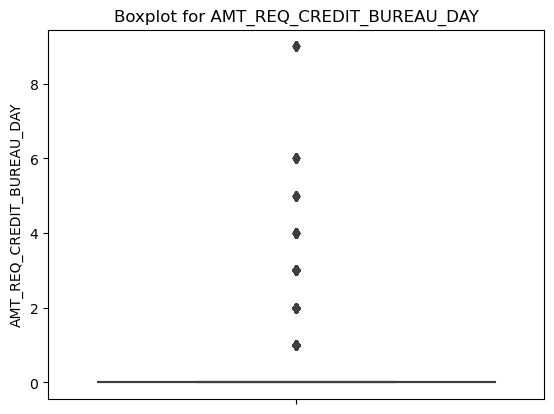

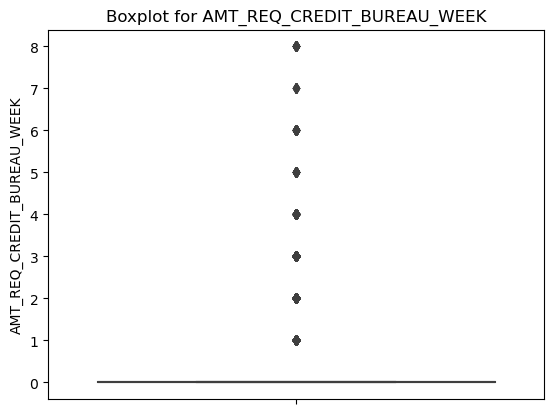

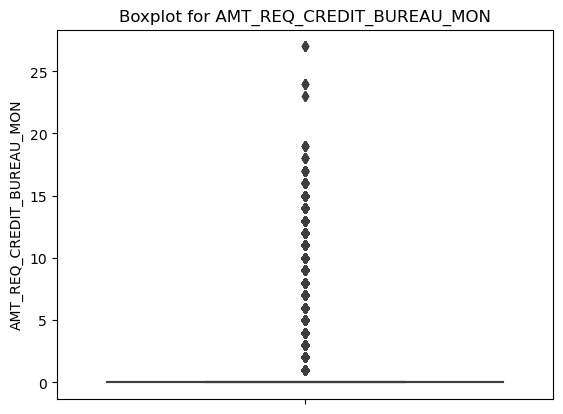

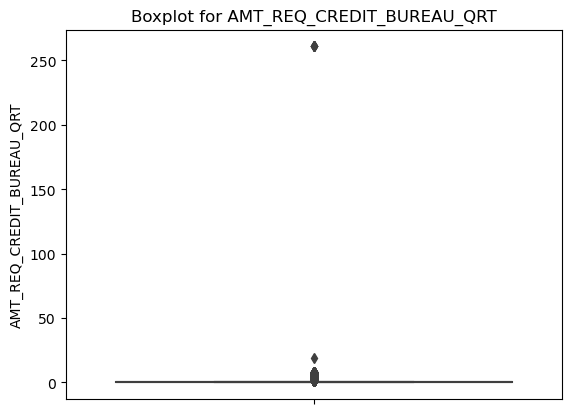

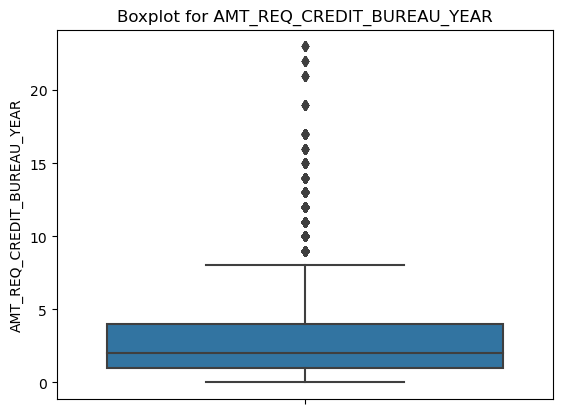

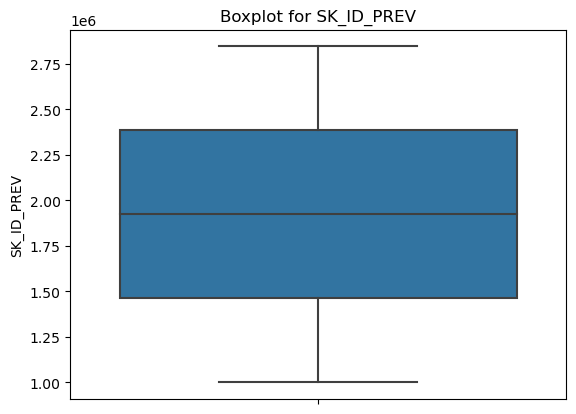

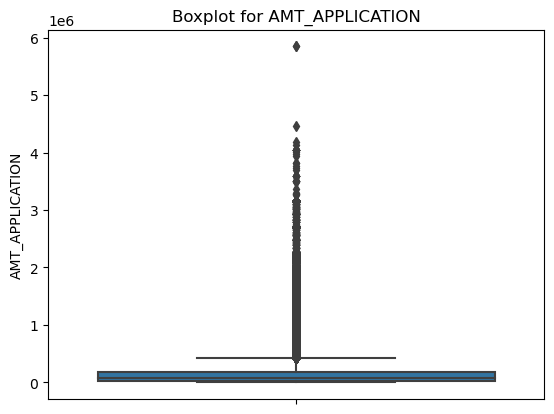

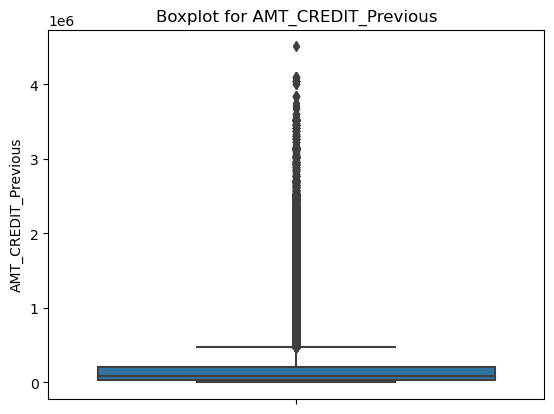

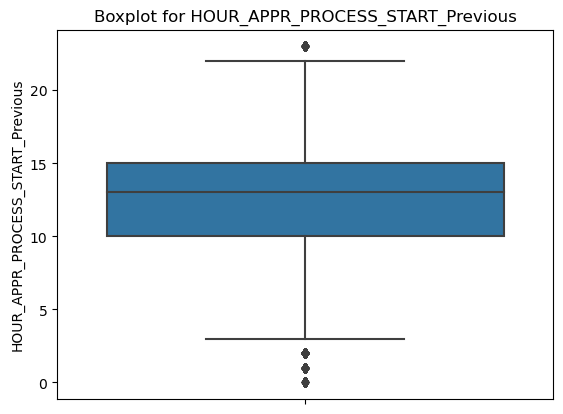

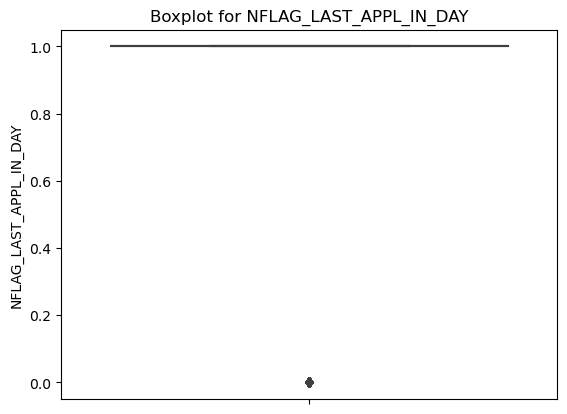

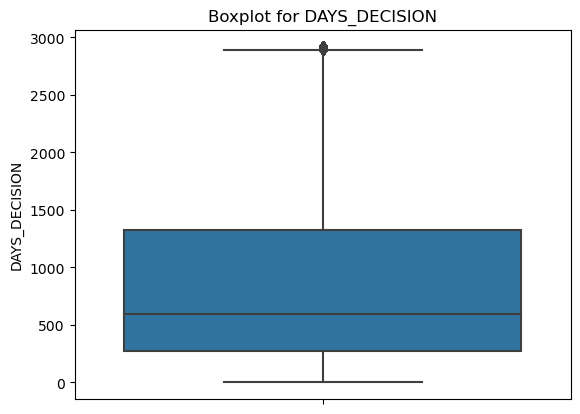

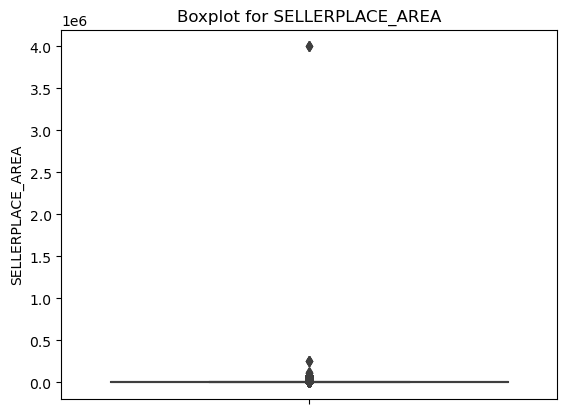

In [117]:
# Filter numeric columns to avoid non-numeric data issues
num_cols = merging_frames.select_dtypes(include=['number']).columns

# Plot boxplots for numeric columns
for col in num_cols:
    sns.boxplot(y=merging_frames[col])  # Use 'y' for vertical boxplots
    plt.title(f"Boxplot for {col}")
    plt.show()


### Bi-variate Analysis

NAME_FAMILY_STATUS    Civil marriage  Married  Separated  \
NAME_CONTRACT_STATUS                                       
Approved                       75455   477237      45155   
Canceled                       22098   133590      12605   
Refused                        24500   128003      13177   
Unused offer                    1862    13313       1448   

NAME_FAMILY_STATUS    Single / not married  Widow  
NAME_CONTRACT_STATUS                               
Approved                             97113  20971  
Canceled                             27209   6263  
Refused                              29453   6443  
Unused offer                          3816    407  


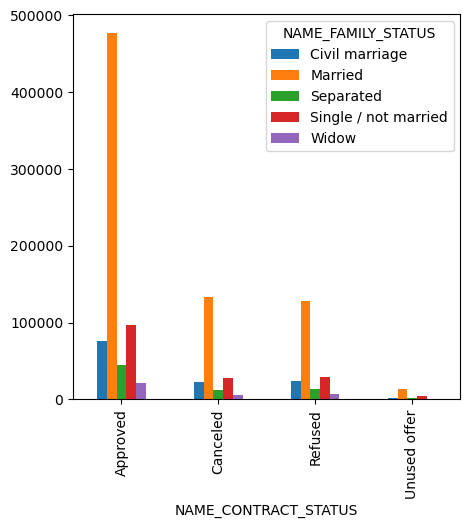

In [118]:
## Highest number of approvals for Married applicant
graph1= pd.crosstab(index=merging_frames['NAME_CONTRACT_STATUS'],columns=merging_frames['NAME_FAMILY_STATUS'])
print(graph1)
graph1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


#### This is evident from the bar graph that shows We may assert that married applicants have received the greatest number of approvals as compared to other groups.

NAME_CONTRACT_TYPE_Previous  Cash loans  Consumer loans  Revolving loans
NAME_CONTRACT_STATUS                                                    
Approved                         194984          450103            70844
Canceled                         169402            1086            31277
Refused                          109755           55593            36228
Unused offer                        377           20466                3


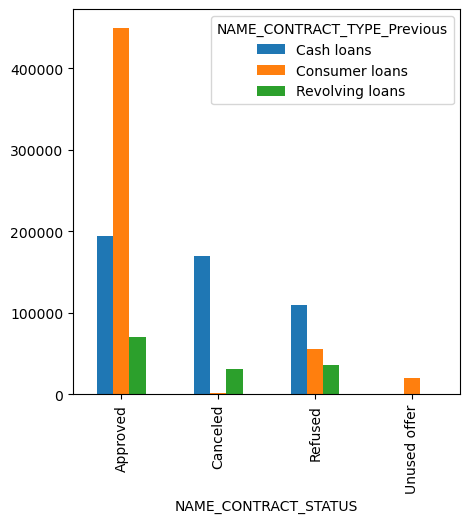

In [119]:
#Consumer loans have the highest number of approvals.
graph2= pd.crosstab(index=merging_frames['NAME_CONTRACT_STATUS'],columns=merging_frames['NAME_CONTRACT_TYPE_Previous'])
print(graph2)
graph2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


#### This is evident from the bar graph that shows We may say that consumer loans have the highest approval rate when compared to other categories.

NAME_CONTRACT_TYPE_Current  Cash loans  Revolving loans
NAME_CONTRACT_STATUS                                   
Approved                        655781            60150
Canceled                        187363            14402
Refused                         186931            14645
Unused offer                     18813             2033


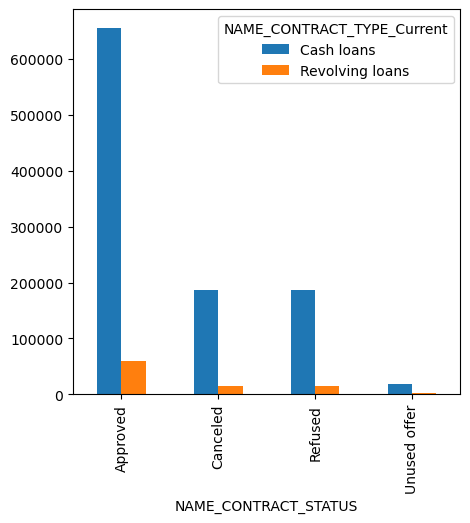

In [120]:
#The highest number of approved loans are cash loans.
graph3= pd.crosstab(index=merging_frames['NAME_CONTRACT_STATUS'],columns=merging_frames['NAME_CONTRACT_TYPE_Current'])
print(graph3)
graph3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


#### We can see from the bar graph that displays In comparison to other categories, we may claim that most of the Cash loans have the highest count of Approved loans.

NAME_HOUSING_TYPE     Co-op apartment  House / apartment  Municipal apartment  \
NAME_CONTRACT_STATUS                                                            
Approved                         2469             630551                26478   
Canceled                          511             179293                 7046   
Refused                           597             177712                 6891   
Unused offer                      296              18044                  640   

NAME_HOUSING_TYPE     Office apartment  Rented apartment  With parents  
NAME_CONTRACT_STATUS                                                    
Approved                          6410             12082         37941  
Canceled                          1690              3199         10026  
Refused                           1749              3368         11259  
Unused offer                       169               274          1423  


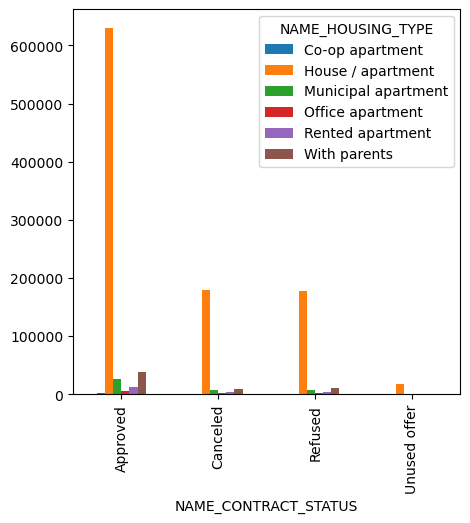

In [121]:
#The highest number of approvals is for house/apartment owners.
graph4= pd.crosstab(index=merging_frames['NAME_CONTRACT_STATUS'],columns=merging_frames['NAME_HOUSING_TYPE'])
print(graph4)
graph4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()


### This is evident from the bar graph that shows We may assert that married applicants have received the greatest number of approvals as compared to other

### Multivariate Analysis(correlation matrix for merged data frame)

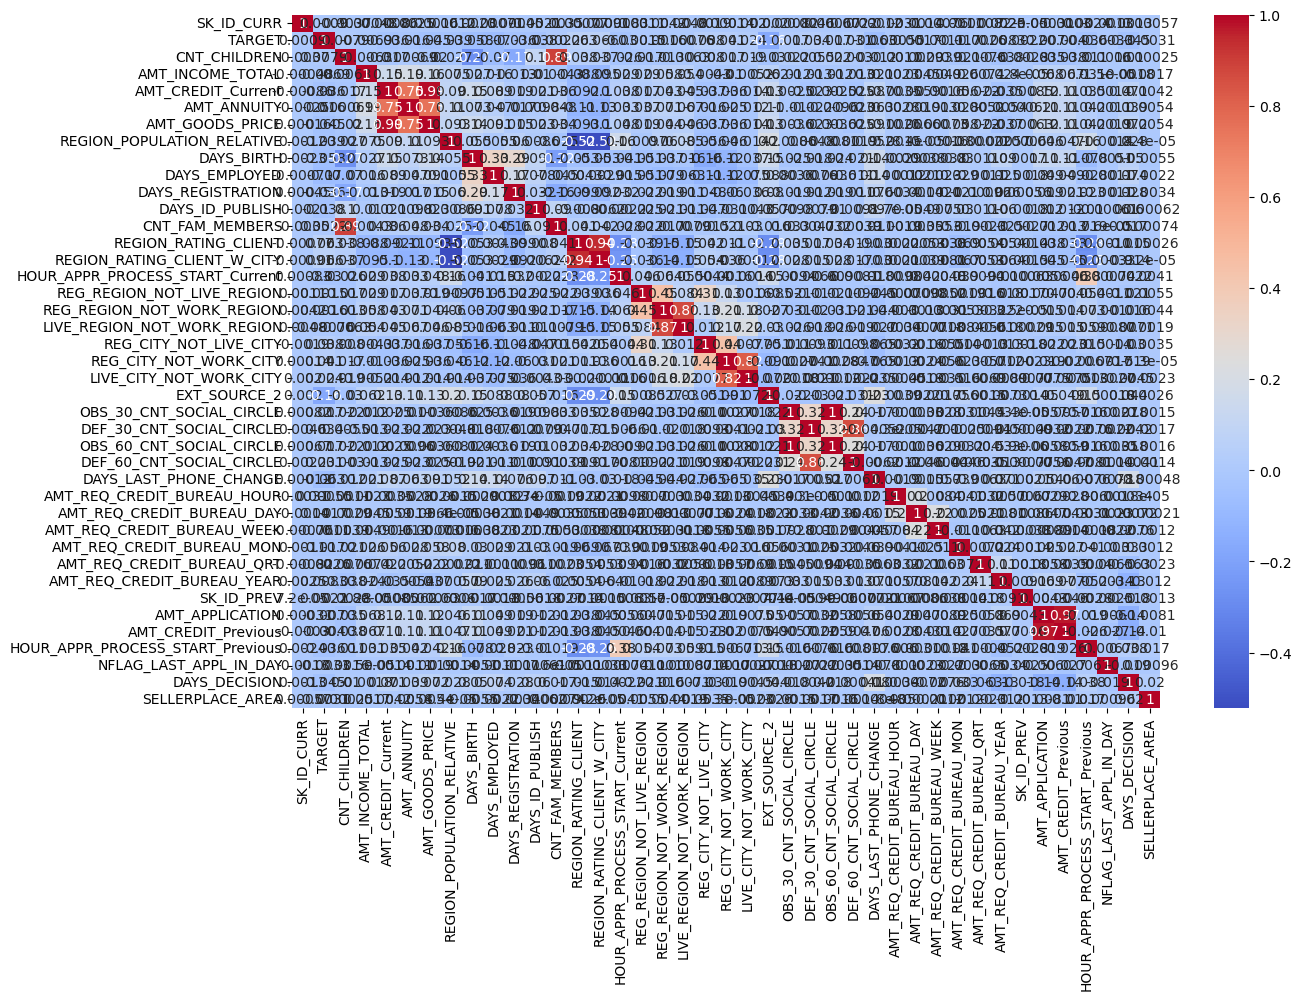

In [122]:
plt.figure(figsize=[14,9])
sns.heatmap( merging_frames.corr(), annot= True,cmap='coolwarm')
plt.show()

One important predictor is income: Income level is a crucial consideration when evaluating loan risk because applicants with higher incomes have far lower default rates. 

Loan Types and Risks: Compared to revolving loans, cash loans have a higher default rate despite being the most popular. To reduce risks, cash borrowing tactics must be customized. 

Impact of Demographics: While family status and housing type (e.g., married applicants or house/apartment owners) positively correlate with better repayment behavior, gender has no discernible effect on default risk. 

Outliers in Credit and Annuity Amounts: High-value loan amounts indicate heightened risk, underscoring the need for more investigation in these situations.

Risk is Informed by Historical Trends: Examining prior loan applications can show recurrent default trends in particular applicant groups, which can inform lending decisions today. 
 
Age and Employment Tenure Correlation: Older applicants with longer work histories are more likely to make repayments, highlighting the importance of giving these aspects careful consideration when assessing risk. 
 
Portfolio Insights: POS portfolios show unique patterns that can necessitate tailored assessment procedures to take particular risk profiles into consideration. 
 
Actionable Suggestions: To maximize loan approvals and reduce defaults, apply EDA findings, tighten screening, divide applicants into risk categories, and balance data imbalances.